In [1]:
! /Applications/Python\3.11.5/Install\ Certificates.command


'/Applications/Python\3.11.5/Install\' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install ebooklib 

In [2]:
import numpy as np

In [3]:
np.version.version

'1.26.4'

In [4]:
import os
import ssl
import certifi
import nltk

# Use the certificate provided by certifi
os.environ['SSL_CERT_FILE'] = certifi.where()

# Download the punkt package from NLTK
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# import relevant packages
import os
import re
import fitz  # PyMuPDF
from ebooklib import epub
import nltk
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import subprocess
import matplotlib.pyplot as plt


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Extract the text from files
To iterate over a directory, where there are many .pdf files and .epub files of Italian novels (in Italian language). 

For each file, parse out the text first. Then, segment the text according to sentences.

In [6]:
def parse_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    text = ""
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text += page.get_text()
    doc.close()
    return text

def parse_epub(epub_file):
    book = epub.read_epub(epub_file)
    book_text = ""
    for item in book.get_items():
        if isinstance(item, epub.EpubHtml):
            book_text += item.get_body_content().decode('utf-8', errors='ignore')  # Decode content and ignore errors
    return book_text

In [7]:
def segment_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

In [10]:
def process_files_in_directory(directory):
    filename2sentences = {}
    
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".pdf"):
            file_path = os.path.join(directory, filename)
            text = parse_pdf(file_path)
            sentences = segment_sentences(text)
            filename2sentences[filename] = sentences
            print(f"PDF File: {filename}")
            print(f"Number of sentences: {len(sentences)}")
            print("Sample sentences:")
            for idx, sentence in enumerate(sentences[:5]):
                print(f"{idx+1}. {sentence}")
            print("------------------------------------------")
        elif filename.endswith(".epub"):
            file_path = os.path.join(directory, filename)
            text = parse_epub(file_path)
            sentences = segment_sentences(text)
            filename2sentences[filename] = sentences
            print(f"EPUB File: {filename}")
            print(f"Number of sentences: {len(sentences)}")
            print("Sample sentences:")
            for idx, sentence in enumerate(sentences[:5]):
                print(f"{idx+1}. {sentence}")
            print("------------------------------------------")
        else:
            print(f'[WARN] Skip {filename}')
            continue
    
    return filename2sentences
        

directory_path = '1/data/Part 1/'
filename2sentences = process_files_in_directory(directory_path)
filename2sentences.keys()

  0%|          | 0/49 [00:00<?, ?it/s]

EPUB File: Collezione di sabbia.epub
Number of sentences: 1341
Sample sentences:
1. 
        <div>
            <svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="100%" height="100%" viewbox="0 0 587 910" preserveaspectratio="none">
                <image width="587" height="910" xlink:href="cover.jpeg"/>
            </svg>
        </div>
    <body class="calibre"><p class="calibre_"><span class="italic">La prima edizione di Collezione di sabbia uscì nell'ottobre del 1984 nella collana "Saggi blu" dell'editore Garzanti.
2. A differenza di quanto era accaduto per i libri fin allora pubblicati da Einaudi - quasi sempre accompagnati, al loro apparire, da interviste e autocommenti - Calvino si limitò a scrivere per la quarta di copertina del volume la breve presentazione anonima che viene qui riprodotta.</span><br class="calibre1"/></p><p class="calibre1" style="margin:0pt; border:0pt; height:1em"> </p><p class="calibre_"><span class="ita

EPUB File: Guardare.epub
Number of sentences: 5732
Sample sentences:
1. <body id="nav">
<div class="header">
<h1>Indice</h1>
</div>
<div class="main">
<nav epub:type="toc" id="toc">
<ol>
<li><a href="p000_cover.xhtml">Copertina</a>
<ol>
<li><a href="p000_cover.xhtml#cover">L’immagine</a></li>
<li><a href="p001_il-libro.xhtml">Il libro</a></li>
<li><a href="p002_l-autore.xhtml">L’autore</a></li>
</ol>
</li>
<li><a href="p003_frontispiece.xhtml">Frontespizio</a></li>
<li><a href="p004_prefazione.xhtml">Prefazione.
2. Un modo di guardare.
3. di Marco Belpoliti</a></li>
<li><a href="p005_nota.xhtml">Nota all’edizione</a></li>
<li><a href="p006_ringraziamenti.xhtml">Ringraziamenti</a></li>
<li><a href="p007_half-title.xhtml">GUARDARE</a></li>
<li><a href="p008_parte-01.xhtml">DISEGNO</a>
<ol>
<li><a href="p009_capitolo-01.xhtml">Nota introduttiva</a></li>
<li><a href="p009_capitolo-01.xhtml#s1">Vignetta anonima</a></li>
<li><a href="p009_capitolo-01.xhtml#s2">Vignetta infame</a></li>
<li><a

EPUB File: I Racconti.epub
Number of sentences: 6494
Sample sentences:
1. &#13;&#13;<p class="center"> </p>&#13;<p class="center"><span class="bold">Italo Calvino</span></p>&#13;&#13;&#13;<h1 id="heading_id_1" class="center"><span class="bold">I racconti</span></h1>&#13;&#13;&#13;<p> </p>&#13;<p>I RACCONTI</p>&#13;<p> </p>&#13;<p>Uno scenario di scogli e di boschi, popolato di pescatori subacquei e cacciatori infallibili o schiappini, regno di ragazzi, pesci, granchi, rettili e uccelli, è il dato di partenza della fantasia di Calvino.
2. Un pomeriggio, Adamo s'intitola uno dei suoi racconti più tipici: ma sull'Eden di Calvino si riflette sempre la spinosa e aspra realtà della convivenza umana.
3. Lo scenario dei limpidi giochi infantili è lo stesso di quello delle storie di guerra: una guerra nei boschi, questa di Calvino, in cui avventure allucinanti, da Ultimo viene il corvo a Il bosco degli animali, prendono un colore di fiaba, come fossero raccontate dopo cent'anni.
4. La ricerca d

EPUB File: Il sentiero dei nidi di ragno.epub
Number of sentences: 3161
Sample sentences:
1. <body class="calibre">
<img src="index-1_1.jpg" class="calibre1"/><p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2">Italo Calvino </p>
<p class="calibre2">Il sentiero dei nidi di ragno </p>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2">Con la prefazione dell’autore </p>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"/>
<p class="calibre2"><b class="ca

EPUB File: L'illuminismo mio e tuo.epub
Number of sentences: 2140
Sample sentences:
1. <body id="nav">
<div class="header">
<h1>Indice</h1>
</div>
<div class="main">
<nav epub:type="toc" id="toc">
<ol>
<li><a href="p000_cover.xhtml">Copertina</a>
<ol>
<li><a href="p000_cover.xhtml#cover">L’immagine</a></li>
<li><a href="p001_il-libro.xhtml">Il libro</a></li>
<li><a href="p002_l-autore.xhtml">Gli autori</a></li>
</ol>
</li>
<li><a href="p003_frontispiece.xhtml">Frontespizio</a></li>
<li><a href="p004_prefazione.xhtml">Prefazione.
2. di Mario Barenghi</a></li>
<li><a href="p005_nota.xhtml">Nota all’edizione</a></li>
<li><a href="p006_bibliografiche.xhtml">Sigle e abbreviazioni bibliografiche</a></li>
<li><a href="p007_half-title.xhtml">L’ILLUMINISMO MIO E TUO</a></li>
<li><a href="p008_parte-01.xhtml">Capitolo I. Libri di altri</a>
<ol>
<li><a href="p009_capitolo-01.xhtml">1</a></li>
<li><a href="p010_capitolo-02.xhtml">2</a></li>
<li><a href="p011_capitolo-03.xhtml">3</a></li>
<li><a hr

EPUB File: La memoria del mondo e altre storie cosmicomiche .epub
Number of sentences: 2447
Sample sentences:
1. <body id="nav">&#13;
  <div class="header">&#13;
    <h1><span style="font-style: italic;">Indice</span></h1>&#13;
  </div>&#13;
&#13;
  <div class="main">&#13;
    <nav epub:type="toc" id="toc"><ol>&#13;
      <li><a href="../Text/titlepage.xhtml">Copertina</a> &#13;
&#13;
      <ol>&#13;
        <li><a href="../Text/p001_il-libro.xhtml">Il libro</a></li>&#13;
&#13;
        <li><a href="../Text/p002_l-autore.xhtml">L’autore</a></li>&#13;
      </ol></li>&#13;
&#13;
      <li><a href="../Text/p003_frontispiece.xhtml">Frontespizio</a></li>&#13;
&#13;
      <li><a href="../Text/p004_presentazione.xhtml">Presentazione</a></li>&#13;
&#13;
      <li><a href="../Text/p005_cronologia.xhtml">Cronologia</a></li>&#13;
&#13;
      <li><a href="../Text/p006_bibliografia.xhtml">Bibliografia essenziale</a></li>&#13;
&#13;
      <li><a href="../Text/p007_half-title.xhtml">LA MEMORIA DEL MO

EPUB File: Le città invisibili .epub
Number of sentences: 1082
Sample sentences:
1. <body id="cover" xml:lang="it-IT">&#13;
<div><img alt="Copertina.
2. «Le città invisibili» di Italo Calvino" src="links/images/cover_800.jpg"/></div>&#13;
</body>&#13;

<body id="il-libro" xml:lang="it-IT">&#13;
<div class="header">&#13;
	<h1>Il libro</h1>&#13;
</div>&#13;
<div class="main">&#13;
	<p><em>“Le città invisibili</em> si presenta come una serie di relazioni di viaggio che Marco Polo fa a Kublai Kan imperatore dei Tartari.
3. … A questo imperatore melanconico, che ha capito che il suo sterminato potere conta ben poco perché tanto il mondo sta andando in rovina, un viaggiatore visionario racconta di città impossibili … Quello che sta a cuore al mio Marco Polo è scoprire le ragioni segrete che hanno portato gli uomini a vivere nelle città, ragioni che potranno valere al di là di tutte le crisi.
4. Le città sono un insieme di tante cose: di memoria, di desideri, di segni d’un linguaggio; le cit

EPUB File: Lettere .epub
Number of sentences: 17521
Sample sentences:
1. <body id="nav">
<div class="header">
<h1>Indice</h1>
</div>
<div class="main">
<nav epub:type="toc" id="toc">
<ol>
<li><a href="p000_cover.xhtml">Copertina</a>
<ol>
<li><a href="p000_cover.xhtml#cover">L’immagine</a></li>
<li><a href="p001_il-libro.xhtml">Il libro</a></li>
<li><a href="p002_l-autore.xhtml">L’autore</a></li>
</ol>
</li>
<li><a href="p003_frontispiece.xhtml">Frontespizio</a></li>
<li><a href="p004_introduzione.xhtml">Introduzione.
2. di Claudio Milanini</a></li>
<li><a href="p005_avvertenza-01.xhtml">Avvertenza alla prima edizione (2000).
3. di Luca Baranelli</a></li>
<li><a href="p006_avvertenza-02.xhtml">Avvertenza alla nuova edizione (2023).
4. di Luca Baranelli</a></li>
<li><a href="p007_abbreviazioni.xhtml">Tavola delle sigle e delle abbreviazioni</a></li>
<li><a href="p008_half-title.xhtml">LETTERE</a></li>
<li><a href="p009_capitolo-01.xhtml">1940</a></li>
<li><a href="p010_capitolo-02.xhtml"

EPUB File: Marcovaldo ovvero Le stagioni in città .epub
Number of sentences: 1742
Sample sentences:
1. <body class="calibre">&#13;
  <p class="calibre1" id="filepos109"><img alt="" class="calibre2" id="filepos137" src="../Images/00006.jpg"/></p>&#13;
&#13;
  <div class="mbppagebreak" id="calibre_pb_0"/>&#13;
</body>&#13;

<body class="calibre">&#13;
  <p class="calibre3" id="filepos227"><span class="calibre4"><span class="italic"><span class="calibre5">Il libro</span></span></span></p>&#13;
&#13;
  <blockquote class="calibre6">&#13;
    <blockquote class="calibre7">&#13;
      <span class="calibre8"><span class="calibre5">“In mezzo alla città di cemento e asfalto, Marcovaldo va in cerca della Natura.
2. Ma esiste ancora, la Natura?
3. Quella che egli trova è una Natura dispettosa, contraffatta, compromessa con la vita artificiale.
4. Personaggio buffo e melanconico, Marcovaldo è il protagonista d’una serie di favole moderne, dove Italo Calvino va segnando, come in un suo block-notes s

EPUB File: Prima che tu dica «Pronto» .epub
Number of sentences: 2731
Sample sentences:
1. <body style="margin:0; padding:0; font-size:0;">
<div>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" height="100%" version="1.1" viewbox="0 0 1277 2167" width="100%">
 <image height="2167" width="1277" xlink:href="images/cover.jpg"/>
</svg>
</div>
</body>


<h3 class="author">Italo Calvino</h3>
<h1 class="title">PRIMA CHE TU DICA<br/>«PRONTO»</h1>
<h2 class="subtitle">Presentazione dell’autore</h2>
<h4 class="publisher">MONDADORI</h4><!--page_no="III"-->

<p class="center"><span>© 1993 by Palomar S.r.l.
2. e Arnoldo Mondadori Editore S.p.A., Milano</span></p>
<p class="center"><span>© 2002 by The Estate of Italo Calvino</span></p>
<p class="center"><span>e Arnoldo Mondadori Editore S.p.A., Milano</span></p>
<p> </p>
<p class="center"><em>A questa edizione ha collaborato Luca Baranelli</em></p>
<p> </p>
<p class="center"><small><small>COPERTINA</small></small><

EPUB File: Sono nato in America interviste.epub
Number of sentences: 6872
Sample sentences:
1. <body id="nav">&#13;
  <div class="header">&#13;
    <h1><span class="all-small-caps" style="font-style: italic;">INDICE GENERALE</span></h1>&#13;
  </div>&#13;
&#13;
  <div class="main">&#13;
    <nav epub:type="toc" id="toc"><ol>&#13;
      <li><a href="../Text/p000_cover.xhtml">Copertina</a> &#13;
&#13;
      <ol>&#13;
        <li><a href="../Text/p001_il-libro.xhtml">Il libro</a></li>&#13;
&#13;
        <li><a href="../Text/p002_l-autore.xhtml">L’autore</a></li>&#13;
      </ol></li>&#13;
&#13;
      <li><a href="../Text/p003_frontispiece.xhtml">Frontespizio</a></li>&#13;
&#13;
      <li><a href="../Text/p004_introduzione.xhtml">Introduzione.
2. di Mario Barenghi</a></li>&#13;
&#13;
      <li><a href="../Text/p006_nota.xhtml">Nota del curatore.
3. di Luca Baranelli</a></li>&#13;
&#13;
      <li><a href="../Text/p007_half-title.xhtml">Sono nato in America...</a></li>&#13;
&#13;
      <li><

EPUB File: ultimo viene il corvo.epub
Number of sentences: 3951
Sample sentences:
1. <body class="calibre">
<p class="calibre1"><img src="index-1_1.jpg" class="calibre2"/></p>
<p class="calibre1"/>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
</body>

<body class="calibre">
<h2 title="**Nuovi Coralli 152 **, 2" class="calibre4" id="calibre_pb_0"><b class="calibre5">Nuovi Coralli 152 </b></h2>
<h3 class="sigilNotInTOC">2 </h3>

</body>

<body class="calibre">
<h2 class="calibre4" id="calibre_pb_1"><b class="calibre5">Italo Calvino </b></h2>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1">ULTIMO VIENE IL CORVO </p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p class="calibre1"><b class="calibre3"> </b></p>
<p

EPUB File: Un ottimista in America.epub
Number of sentences: 1629
Sample sentences:
1. <body id="cover" xml:lang="it-IT">&#13;
<div><img alt="Copertina.
2. «Un ottimista in America» di Italo Calvino" src="links/images/cover_800.jpg"/></div>&#13;
</body>&#13;

<body id="il-libro" xml:lang="it-IT">&#13;
<div class="header">&#13;
	<h1>Il libro</h1>&#13;
</div>&#13;
<div class="main">&#13;
	<p>“Partendo per gli Stati Uniti, e anche durante il viaggio, spergiuravo che non avrei scritto un libro sull’America (ce n’è già tanti!).
3. Invece ho cambiato idea.
4. I libri di viaggio sono un modo utile, modesto eppure completo di fare letteratura.
5. Sono libri che servono praticamente, anche se, o proprio perché, i paesi cambiano d’anno in anno e fissandoli come li si è visti se ne registra la mutevole essenza; e si può in essi esprimere qualcosa che va al di là della descrizione dei luoghi visti, un rapporto tra sé e la realtà, un processo di conoscenza.
-----------------------------------------

dict_keys(['Collezione di sabbia.epub', 'Eremita a Parigi.epub', 'Fiabe italiane. Raccolte e trascritte da Italo Calvino.epub', 'Fiabe italiane.epub', 'Gli amori difficili.epub', 'Guardare.epub', 'I libri degli altri.epub', 'I nostri antenati.epub', 'I Racconti.epub', 'Il barone rampante.epub', 'Il castello dei destini incrociati .epub', 'Il cavaliere inesistente .epub', 'Il libro dei risvolti .epub', 'Il principe granchio e altre fiabe italiane .epub', 'Il sentiero dei nidi di ragno.epub', 'Il teatro dei ventagli .epub', 'Il visconte dimezzato.epub', "L'illuminismo mio e tuo.epub", "L'Uccel Belverde E Altre Fiabe Italiane .epub", 'La foresta-radice-labirinto.epub', 'La giornata d’uno scrutatore.epub', 'La memoria del mondo e altre storie cosmicomiche .epub', 'La nuvola di smog — La formica argentina .epub', 'La speculazione edilizia.epub', 'La strada di San Giovanni .epub', 'Le città invisibili .epub', 'Le Cosmicomiche.epub', 'Le più belle fiabe popolari italiane .epub', 'Lentrata i

## Parse the sentences
1. Remove all the special characters. 
2. Remove all the meta information like `<span>, <p>, <href>...`, since only the coherent text is useful. 

In [11]:
def clean_text(sentence):
    # Remove HTML tags and attributes
    clean_sentence = re.sub(r'<.*?>', '', sentence)
    # Remove special characters except alphanumeric, spaces, and apostrophes
    clean_sentence = re.sub(r'[^a-zA-Z0-9\s\']', '', clean_sentence)
    # Remove extra spaces
    clean_sentence = re.sub(r'\s+', ' ', clean_sentence).strip()
    return clean_sentence


filename2cleaned_sentences = {}
for filename, sentences in tqdm(filename2sentences.items()):
    cleaned_sentences = []
    for s in sentences:
        cleaned_sentences.append(clean_text(s))
    filename2cleaned_sentences[filename] = cleaned_sentences

  0%|          | 0/49 [00:00<?, ?it/s]

## Get basic statistics
Plot the distribution of sentence length, given a list of sentences

In [12]:
# Function to calculate sentence lengths
def calculate_sentence_lengths(sentences):
    lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    return lengths


sentences = [x for (k, v) in filename2cleaned_sentences.items() for x in v]
lengths = calculate_sentence_lengths(sentences)

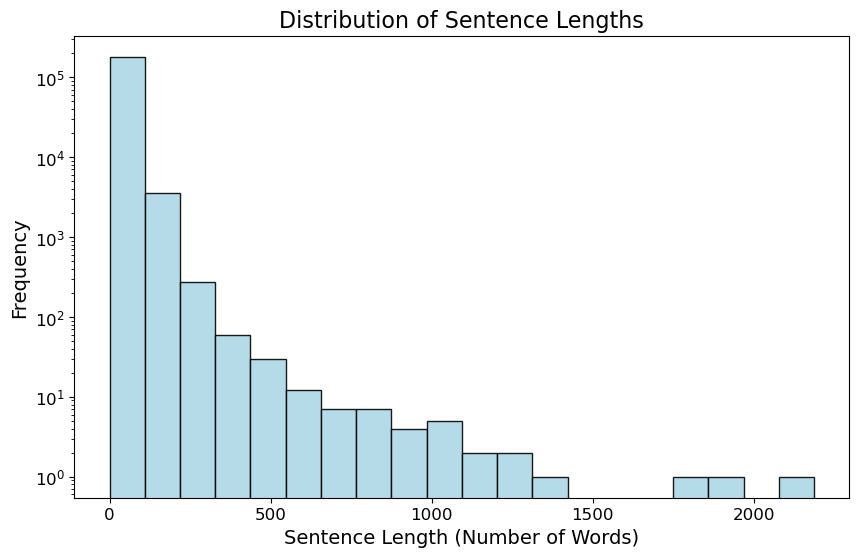

In [13]:
import matplotlib.pyplot as plt

# Function to plot distribution of sentence lengths
def plot_sentence_length_distribution(lengths):
    plt.figure(figsize=(10, 6))
    
    # 设置柱状图颜色为浅蓝色
    plt.hist(lengths, bins=20, edgecolor='black', color='#ADD8E6', alpha=0.9, log=True)
    
    # 设置标题和轴标签
    plt.title('Distribution of Sentence Lengths', fontsize=16)
    plt.xlabel('Sentence Length (Number of Words)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # 去除网格线
    plt.grid(False)
    
    # 调整字体大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.show()

# 示例调用
plot_sentence_length_distribution(lengths)



# Emotion Analysis

In [14]:
from feel_it  import EmotionClassifier
# Initialize emotion classifier
emotion_classifier = EmotionClassifier()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
filename2cleaned_sentences.keys()

dict_keys(['Collezione di sabbia.epub', 'Eremita a Parigi.epub', 'Fiabe italiane. Raccolte e trascritte da Italo Calvino.epub', 'Fiabe italiane.epub', 'Gli amori difficili.epub', 'Guardare.epub', 'I libri degli altri.epub', 'I nostri antenati.epub', 'I Racconti.epub', 'Il barone rampante.epub', 'Il castello dei destini incrociati .epub', 'Il cavaliere inesistente .epub', 'Il libro dei risvolti .epub', 'Il principe granchio e altre fiabe italiane .epub', 'Il sentiero dei nidi di ragno.epub', 'Il teatro dei ventagli .epub', 'Il visconte dimezzato.epub', "L'illuminismo mio e tuo.epub", "L'Uccel Belverde E Altre Fiabe Italiane .epub", 'La foresta-radice-labirinto.epub', 'La giornata d’uno scrutatore.epub', 'La memoria del mondo e altre storie cosmicomiche .epub', 'La nuvola di smog — La formica argentina .epub', 'La speculazione edilizia.epub', 'La strada di San Giovanni .epub', 'Le città invisibili .epub', 'Le Cosmicomiche.epub', 'Le più belle fiabe popolari italiane .epub', 'Lentrata i

In [16]:
import os
import pandas as pd
from tqdm import tqdm

output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

for filename, sentences in tqdm(filename2cleaned_sentences.items()):
    df = []
    
    for start_id in tqdm(range(0, len(sentences), 8)):
        end_id = min(len(sentences) - 1, start_id + 8)
        sentence_batch = sentences[start_id:end_id]
        if len(sentence_batch) > 0: 
            emotions = emotion_classifier.predict(sentence_batch, batch_size=8)
            for s, e in zip(sentence_batch, emotions):
                df.append({'Sentence': s, 'Emotion': e})
        else:
            continue 
    
    df = pd.DataFrame(df)
    
    output_file = os.path.join(output_dir, os.path.basename(filename).replace('.epub', '.csv'))
    
    df.to_csv(output_file, index=False)


 47%|████▋     | 141/301 [03:27<03:15,  1.22s/it]


  8%|▊         | 144/1888 [03:24<36:18,  1.25s/it]


 24%|██▎       | 446/1888 [09:22<22:54,  1.05it/s]


 40%|███▉      | 748/1888 [15:06<25:31,  1.34s/it]


 56%|█████▌    | 1049/1888 [20:41<14:03,  1.01s/it]


 71%|███████   | 1345/1888 [26:05<12:11,  1.35s/it]


 87%|████████▋ | 1641/1888 [31:41<08:40,  2.11s/it]


  3%|▎         | 50/1891 [01:50<59:18,  1.93s/it]  


  6%|▌         | 3/49 [55:56<14:17:40, 1118.71s/it]


KeyboardInterrupt: 

## Load and Visualize predictions in .csv

In [55]:
csv_files = [os.path.join('./results/', x) for x in os.listdir('./results/') if x.endswith('.csv')]

book_emotions = []
for file_path in tqdm(csv_files):
    emotions = pd.read_csv(file_path, index_col=0)
    book_name = file_path.replace('./results/', '').split('.')[0]
    
    row = emotions.value_counts()
    row['book'] = book_name
    book_emotions.append(row)

book_emotions = pd.DataFrame(book_emotions)
book_emotions

100%|██████████| 49/49 [00:01<00:00, 48.05it/s]


Emotion   joy sadness anger  fear  \
0         559     465   222    94   
1         708     902   667   126   
2        4046    5177  4623  1250   
3        4199    4847  4931  1149   
4         655    1137   571   222   
5        2227    1949  1195   360   
6        1673    1566   992   352   
7        1047    1718  1587   392   
8        1405    2683  1809   596   
9         615    1049   853   240   
10        348     381   269    94   
11        332     462   461   100   
12        705     641   328    68   
13        520     569   664   113   
14        681     806  1324   349   
15        445     369   287    87   
16        182     394   308    85   
17        790     755   411   183   
18       7358    7728  7550  2241   
19         51      74    31    17   
20        247     419   305    79   
21        655    1062   471   258   
22        310     564   328   139   
23        309     576   564   115   
24        216     409   148    45   
25        330     467   207    77   
26        484     689   350   200   
27       2153    3105  2432   663   
28        309     535   314   110   
29        243     330   190    78   
30       6222    6045  3954  1299   
31        518     312   126    63   
32        424     726   425   166   
33        793     838   553   172   
34        293     346   518   148   
35        354     455   194    93   
36        711     689   459   135   
37        629     925   947   229   
38        873    1274   715   320   
39       1451    2644  1808   590   
40        828    1067   659   207   
41       2406    2571  1418   476   
42        275     351   176    96   
43        520     524   322    97   
44        364     436   171   181   
45        799    1455  1313   383   
46        661    1094   968   256   
47        337     523   678    90   
48        751    1148   778   220   

Emotion                                               book  
0                                     Collezione di sabbia  
1                                         Eremita a Parigi  
2                                           Fiabe italiane  
3                                           Fiabe italiane  
4                                      Gli amori difficili  
5                                                 Guardare  
6                                      I libri degli altri  
7                                        I nostri antenati  
8                                               I Racconti  
9                                       Il barone rampante  
10                      Il castello dei destini incrociati  
11                                Il cavaliere inesistente  
12                                   Il libro dei risvolti  
13             Il principe granchio e altre fiabe italiane  
14                           Il sentiero dei nidi di ragno  
15                                  Il teatro dei ventagli  
16                                   Il visconte dimezzato  
17                                 L'illuminismo mio e tuo  
18                 L'Uccel Belverde E Altre Fiabe Italiane  
19                             La foresta-radice-labirinto  
20                            La giornata d’uno scrutatore  
21        La memoria del mondo e altre storie cosmicomiche  
22                La nuvola di smog — La formica argentina  
23                                La speculazione edilizia  
24                               La strada di San Giovanni  
25                                    Le città invisibili  
26                                         Le Cosmicomiche  
27                   Le più belle fiabe popolari italiane  
28                                      Lentrata in guerra  
29                            Lettere a Chichita 1962-1963  
30                                                 Lettere  
31                                       Lezioni americane  
32                 Marcovaldo ovvero Le stagioni in città  
33                       Mondo scritto e mondo non scritto  
34       Orlan

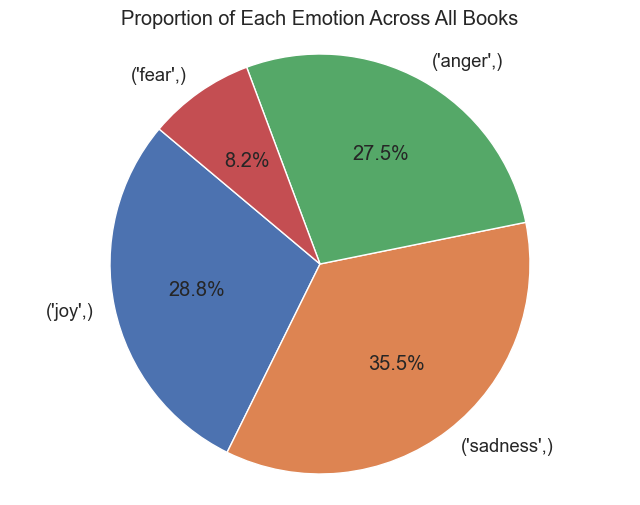

<Figure size 1000x600 with 0 Axes>

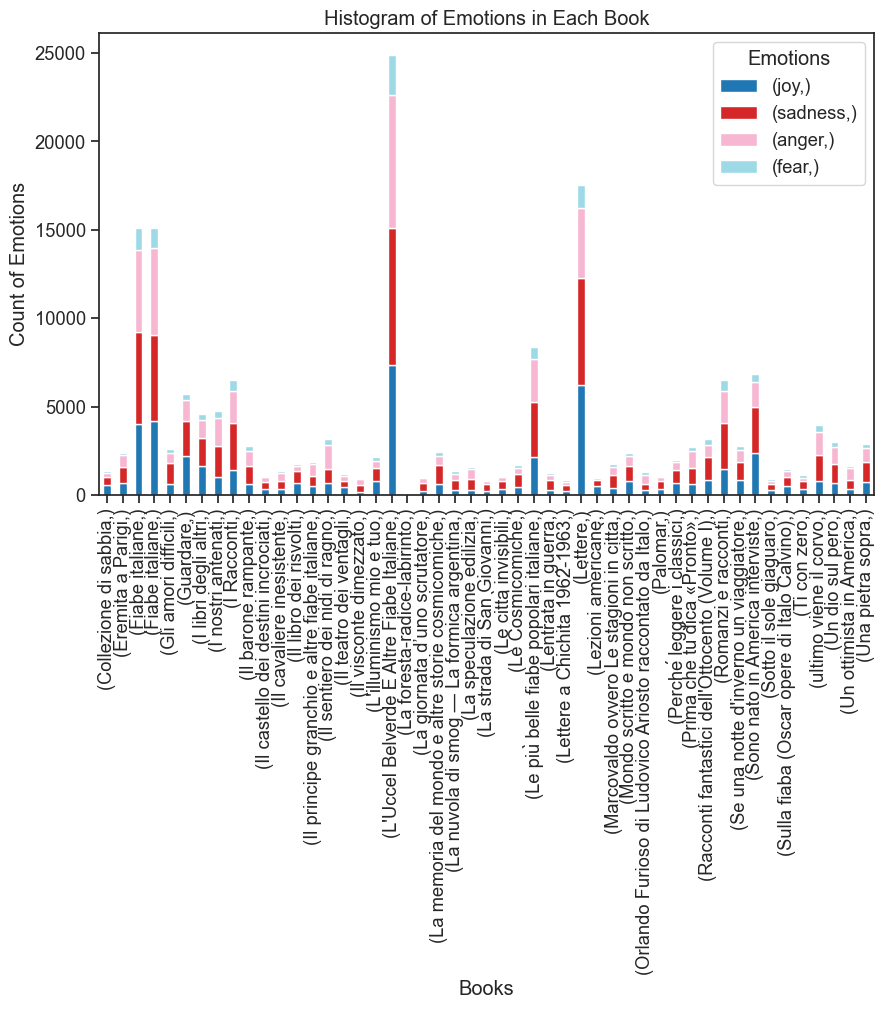

In [57]:
book_emotions_df = pd.DataFrame(book_emotions).fillna(0)

# The dataframe `book_emotions_df` should now have columns 'joy', 'sadness', 'anger', 'fear', and 'book'

# Calculating the total of each emotion across all books
emotion_totals = book_emotions_df[['joy', 'sadness', 'anger', 'fear']].sum()

# Pie chart for the proportion of each emotion
plt.figure(figsize=(8, 6))
plt.pie(emotion_totals, labels=emotion_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Emotion Across All Books')
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
plt.show()

# Histogram for the distribution of each emotion in all books
plt.figure(figsize=(10, 6))
book_emotions_df.set_index('book')[['joy', 'sadness', 'anger', 'fear']].plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Histogram of Emotions in Each Book')
plt.xlabel('Books')
plt.ylabel('Count of Emotions')
plt.legend(title='Emotions')
plt.show()

100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


<Figure size 640x480 with 0 Axes>

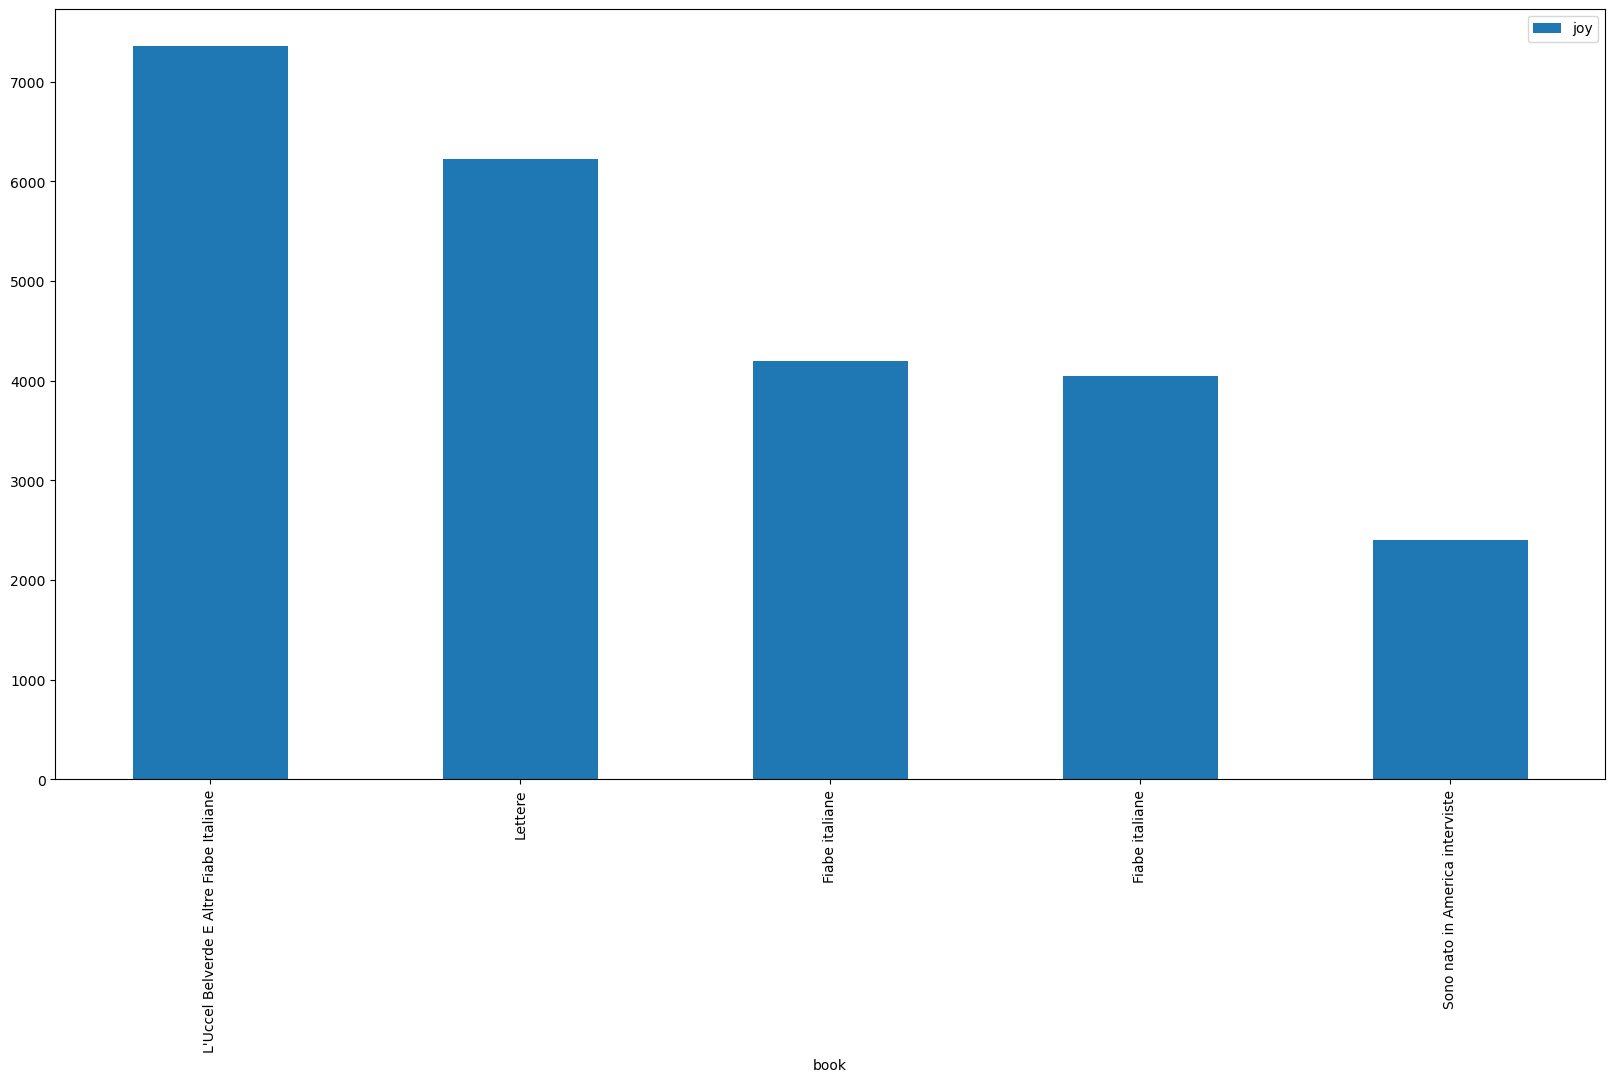

<Figure size 640x480 with 0 Axes>

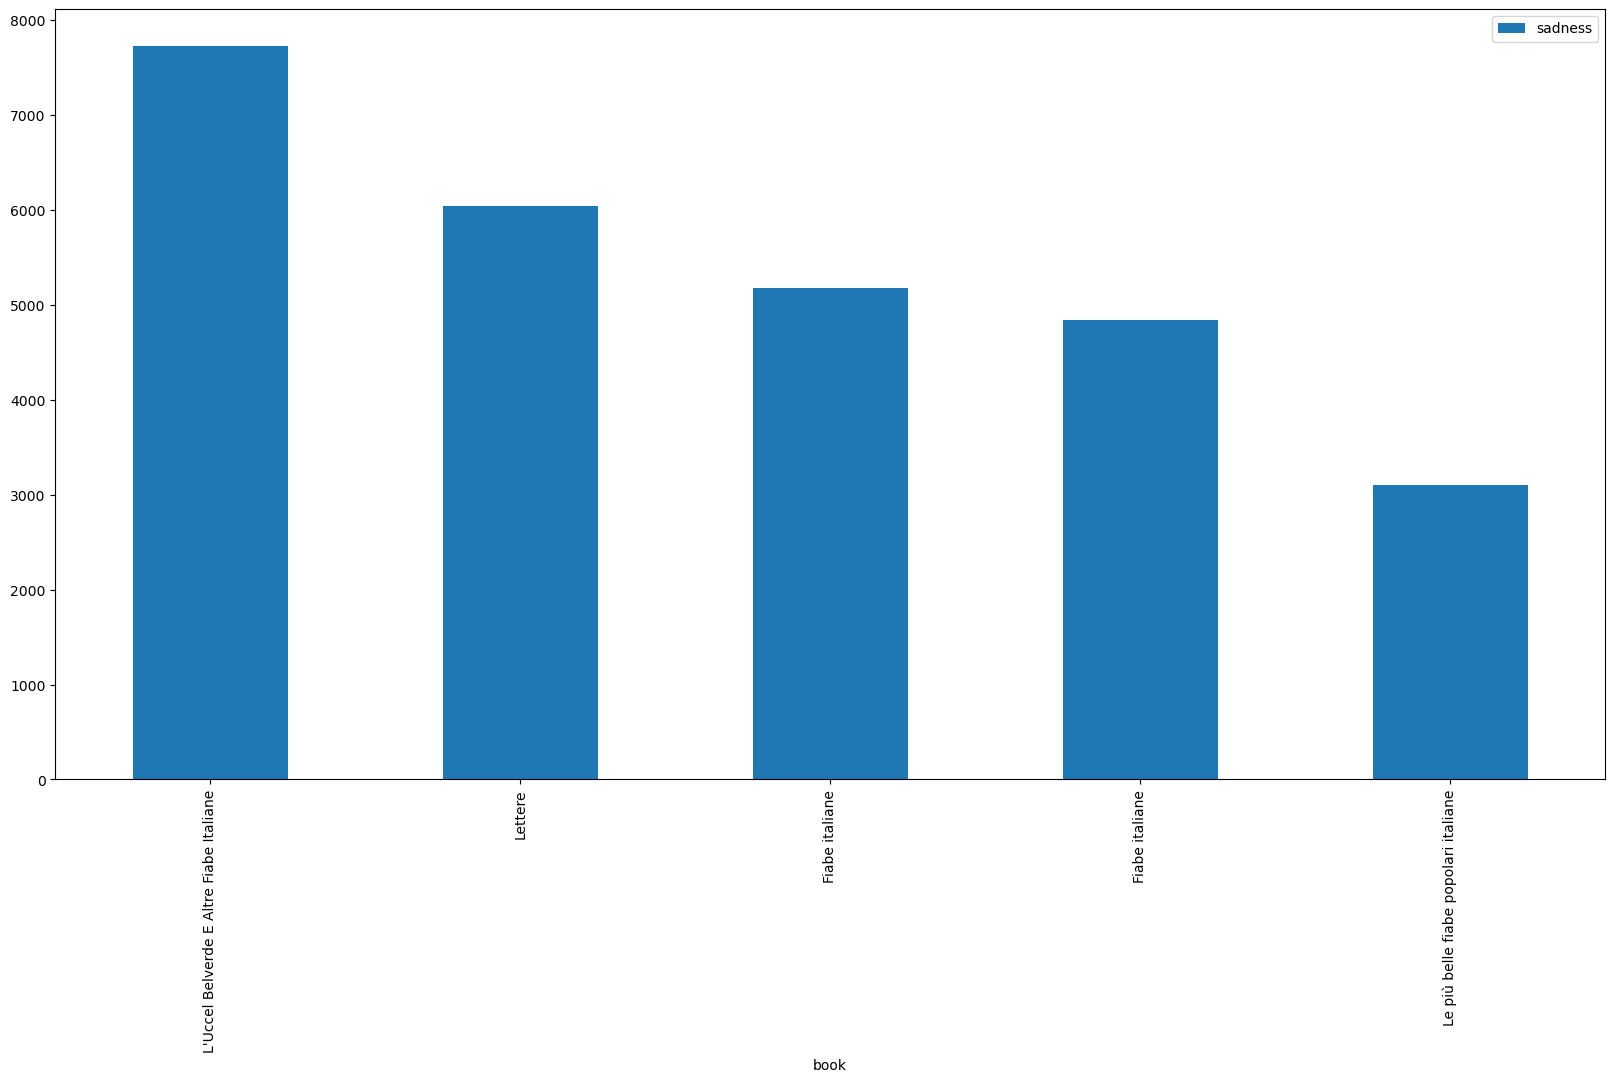

<Figure size 640x480 with 0 Axes>

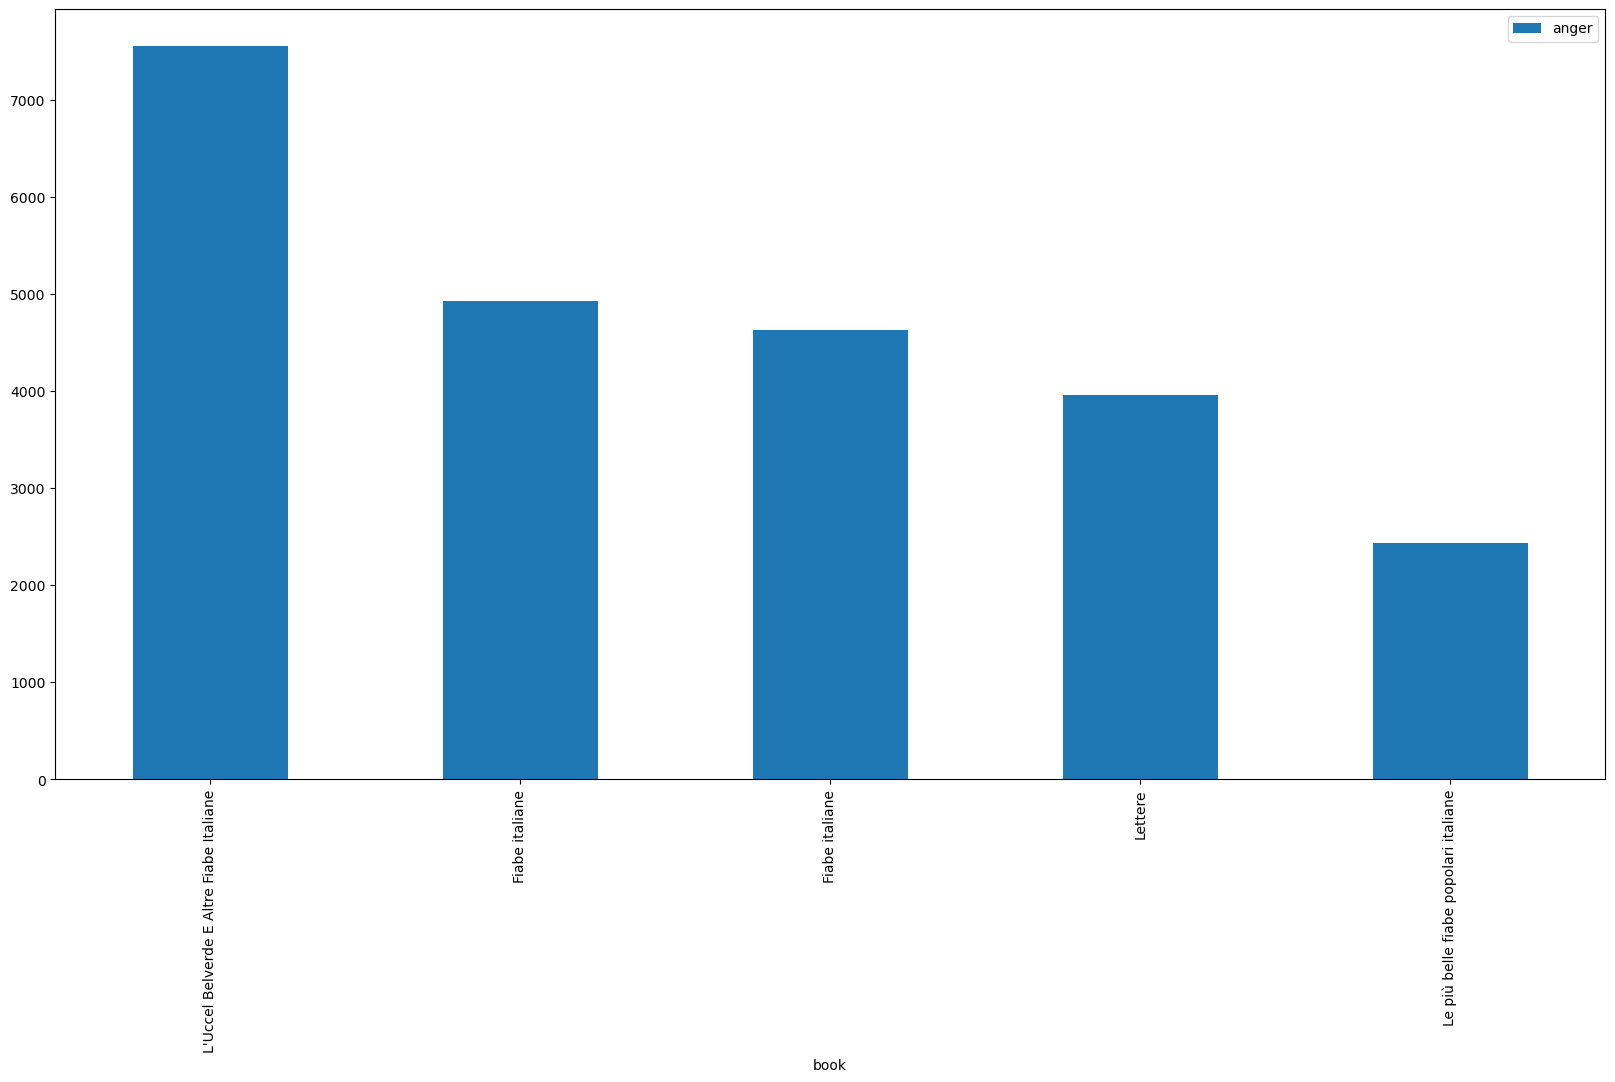

<Figure size 640x480 with 0 Axes>

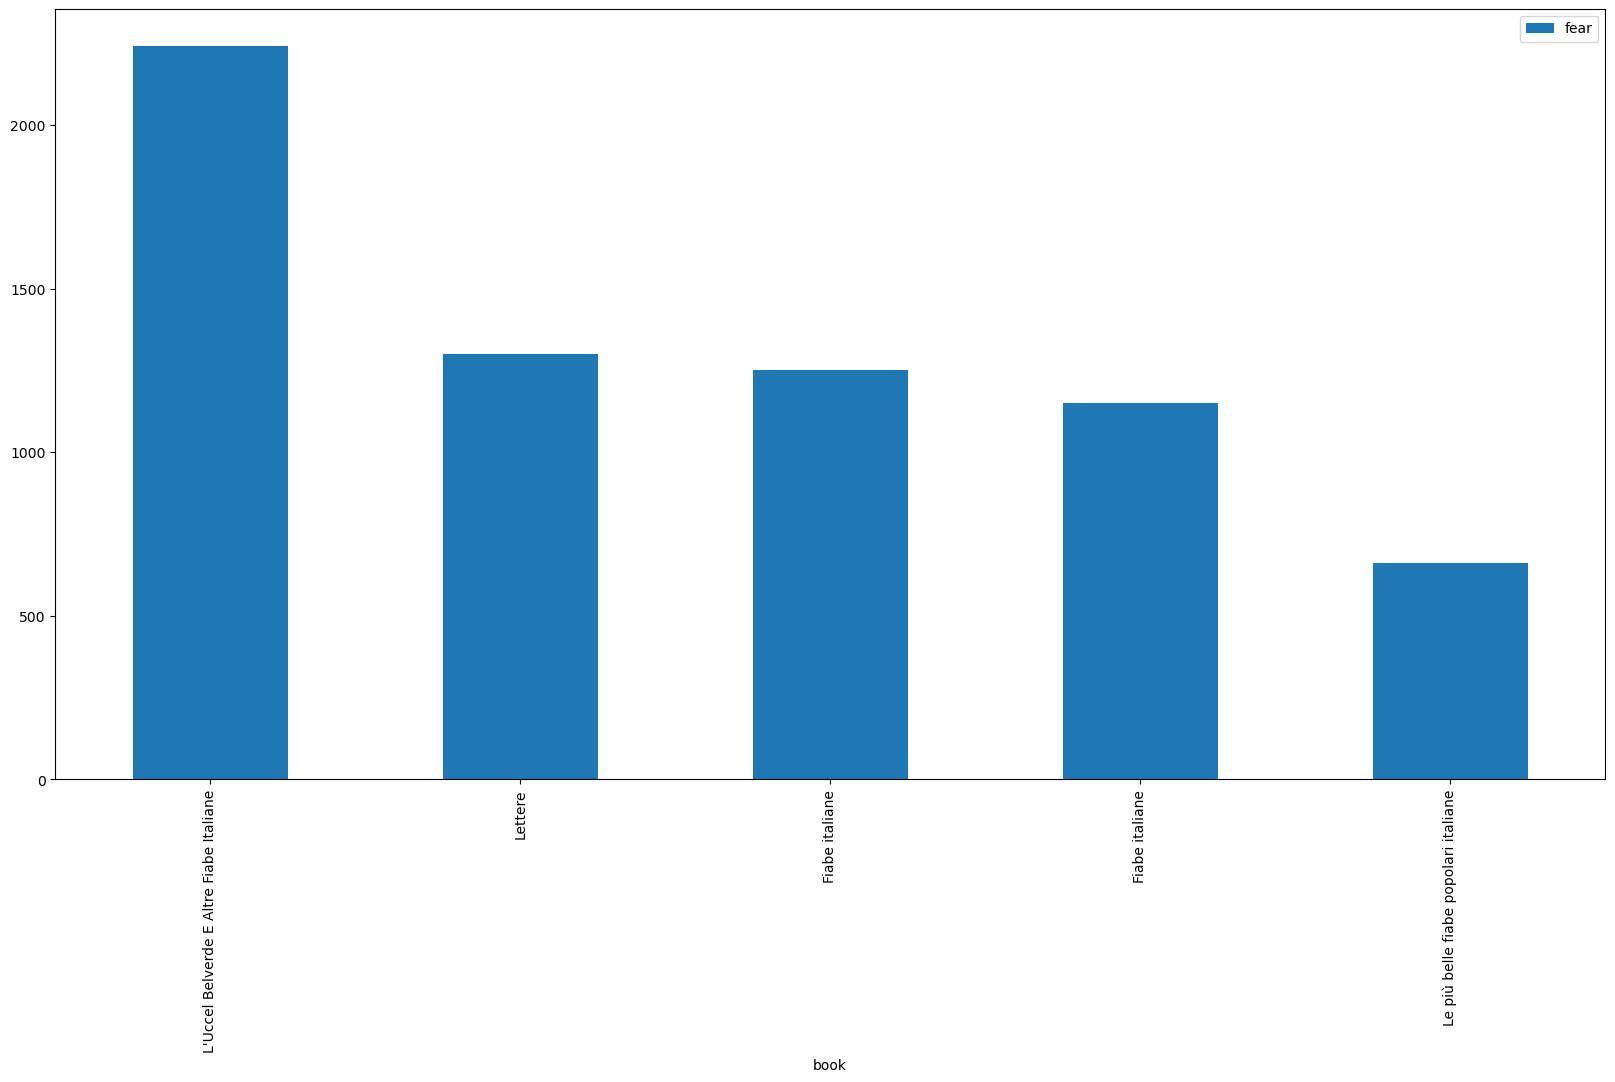

In [18]:
for emotion in tqdm([x for x in book_emotions.columns if x != 'book']):
    plt.figure()
    pd.DataFrame(book_emotions)[['book', emotion]].sort_values(by=emotion).iloc[::-1, :].iloc[:5, :].plot(x='book', y=emotion, kind='bar', figsize=(20, 10))
    plt.savefig(f'{emotion}.png', dpi=300)

# Word Analysis

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk import bigrams
from collections import Counter

import os

In [20]:
text_files = [os.path.join('./results/', x) for x in os.listdir('./results/') if x.endswith('.csv')] 

In [21]:
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
import pandas as pd
from tqdm import tqdm

# 假设 text_files 是一个包含多个CSV文件路径的列表
for text_file in tqdm(text_files):
    try:
        # 使用UTF-8编码读取文件，如果失败则尝试ISO-8859-1编码
        try:
            text_df = pd.read_csv(text_file, encoding='utf-8')
        except UnicodeDecodeError:
            text_df = pd.read_csv(text_file, encoding='iso-8859-1')

        # 检查是否存在 'Sentence' 列
        if 'Sentence' not in text_df.columns:
            print(f"[WARN] '{text_file}' skipped due to missing 'Sentence' column.")
            continue

        # 这里继续您的处理逻辑...
        print(f"Processing file: {text_file}")
        print(text_df.head())  # 打印前几行数据进行检查

    except Exception as e:
        print(f'[ERROR] An error occurred with {text_file}: {e}')
        continue



 20%|██        | 10/49 [00:00<00:00, 47.65it/s]

Processing file: ./results/Collezione di sabbia.csv
                                            Sentence  Emotion
0  La prima edizione di Collezione di sabbia usc ...  sadness
1  A differenza di quanto era accaduto per i libr...      joy
2  Alcuni tratti della fisionomia dello scrittore...  sadness
3  Insieme a dieci di queste cronache di passeggi...      joy
4  Completano il volume tre gruppi di riflessioni...      joy
Processing file: ./results/Eremita a Parigi.csv
                                            Sentence  Emotion
0                                13 img altCopertina      joy
1  Eremita a Parigi di Italo Calvino srclinksimag...      joy
2  Sono nato mentre i miei genitori stavano per t...  sadness
3  Il sapere dei miei genitori convergeva sul reg...      joy
4  Io attratto da unaltra vegetazione quella dell...  sadness
Processing file: ./results/Fiabe italiane. Raccolte e trascritte da Italo Calvino.csv
                                            Sentence  Emotion
0  13 13

 39%|███▉      | 19/49 [00:00<00:00, 57.63it/s]

Processing file: ./results/Il castello dei destini incrociati.csv
                                            Sentence  Emotion
0  Il libro Il significato dogni singola carta di...      joy
1  Ho cominciato con i tarocchi di Marsiglia cerc...      joy
2  Quando le carte affiancate a caso mi davano un...      joy
3  Dal 1947 al 1983 lavor a vario titolo per ledi...  sadness
4  Visse a Sanremo a Torino a Parigi e dal 1980 a...  sadness
Processing file: ./results/Il cavaliere inesistente.csv
                                            Sentence  Emotion
0  13 13 13 Italo Calvino13 13 13 13 Il cavaliere...      joy
1  Ma i pi critici ne scrivono proponendo interpr...  sadness
2  In mezzo al succedersi di trovate buffonesche ...  sadness
3  Con Il cavaliere inesistente che viene ad affi...      joy
4  I nostri antenati si intitola appunto il volum...      joy
Processing file: ./results/Il libro dei risvolti.csv
                                            Sentence  Emotion
0  Indice Copertina

 63%|██████▎   | 31/49 [00:00<00:00, 53.35it/s]

Processing file: ./results/La strada di San Giovanni.csv
                                            Sentence  Emotion
0                                13 img altCopertina      joy
1  La strada di San Giovanni di Italo Calvino src...  sadness
2  Potrei farlo secondo varie chiavi narrative tu...  sadness
3  Dal 1947 al 1983 lavor a vario titolo per ledi...  sadness
4  Visse a Sanremo a Torino a Parigi e dal 1980 a...  sadness
Processing file: ./results/Le città invisibili.csv
                                            Sentence  Emotion
0                                13 img altCopertina      joy
1  Le citt invisibili di Italo Calvino srclinksim...      joy
2  A questo imperatore melanconico che ha capito ...  sadness
3  Le citt sono un insieme di tante cose di memor...      joy
4  Dal 1947 al 1983 lavor a vario titolo per ledi...  sadness
Processing file: ./results/Le Cosmicomiche.csv
                                            Sentence  Emotion
0                                13 im

100%|██████████| 49/49 [00:00<00:00, 57.84it/s]

Processing file: ./results/Racconti fantastici dell'Ottocento (Volume I).csv
                                            Sentence  Emotion
0  13 13 13 Italo Calvino13 13 13 13 RACCONTI FAN...      joy
1  Alla nostra sensibilit doggi lelemento soprann...      joy
2  In ci va vista la modernit del fantastico la r...      joy
3  Sentiamo che il fantastico dice cose che ci ri...      joy
4  von Eichendorff Sortilegio dautunno13 13 13 13...  sadness
Processing file: ./results/Romanzi e racconti.csv
                                            Sentence  Emotion
0  Italo Calvino I racconti I RACCONTI Uno scenar...      joy
1  Un pomeriggio Adamo s'intitola uno dei suoi ra...  sadness
2  Lo scenario dei limpidi giochi infantili lo st...      joy
3  La ricerca di un'armonia con la natura non vie...  sadness
4  La penna di Calvino tende a trasformare tutto ...  sadness
Processing file: ./results/Se una notte d'inverno un viaggiatore.csv
                                            Sentence  Emotio

 37%|███▋      | 5651/15096 [00:15<00:22, 424.24it/s]


 97%|█████████▋| 14636/15096 [00:47<00:02, 177.62it/s]


 55%|█████▍    | 8315/15126 [00:29<00:18, 370.48it/s]


  5%|▌         | 135/2585 [00:00<00:14, 167.87it/s]


 72%|███████▏  | 4123/5731 [00:23<00:09, 162.08it/s]


100%|██████████| 4583/4583 [00:23<00:00, 192.30it/s]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4348\3003508350.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 5))
 16%|█▌        | 757/4744 [00:02<00:16, 241.84it/s]


 16%|█▋        | 8/49 [04:12<21:31, 31.50s/it]


KeyboardInterrupt: 

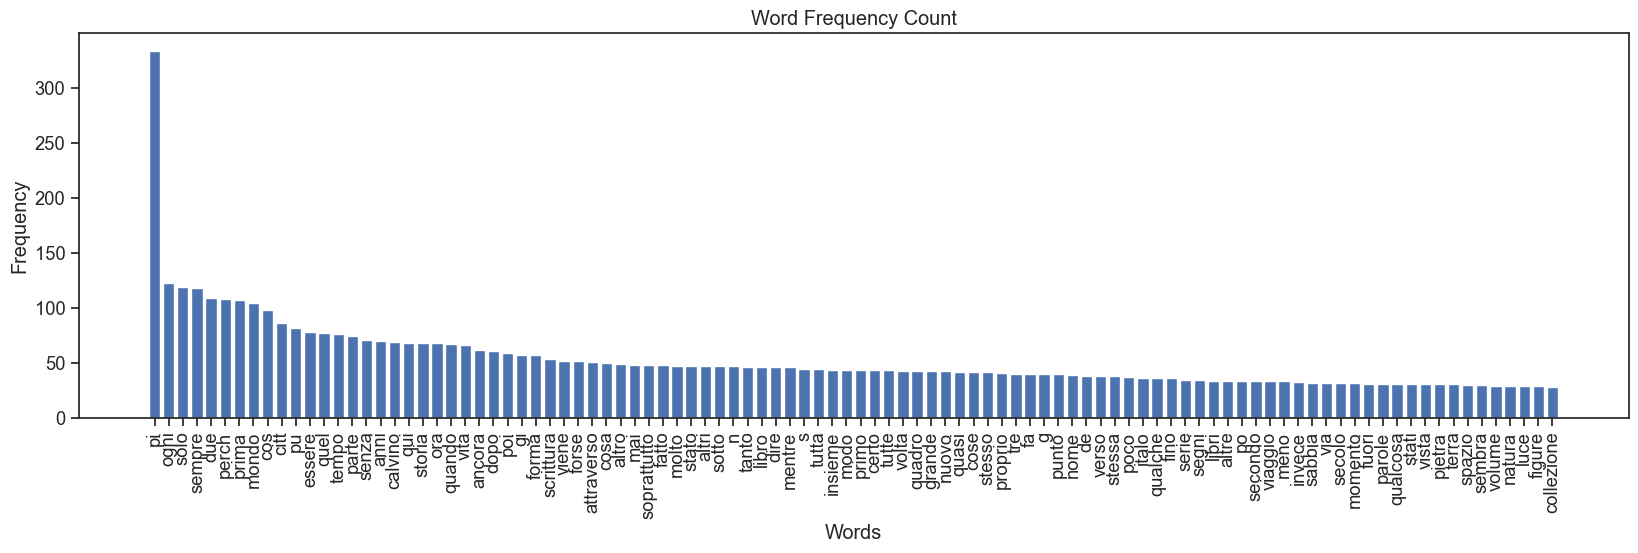

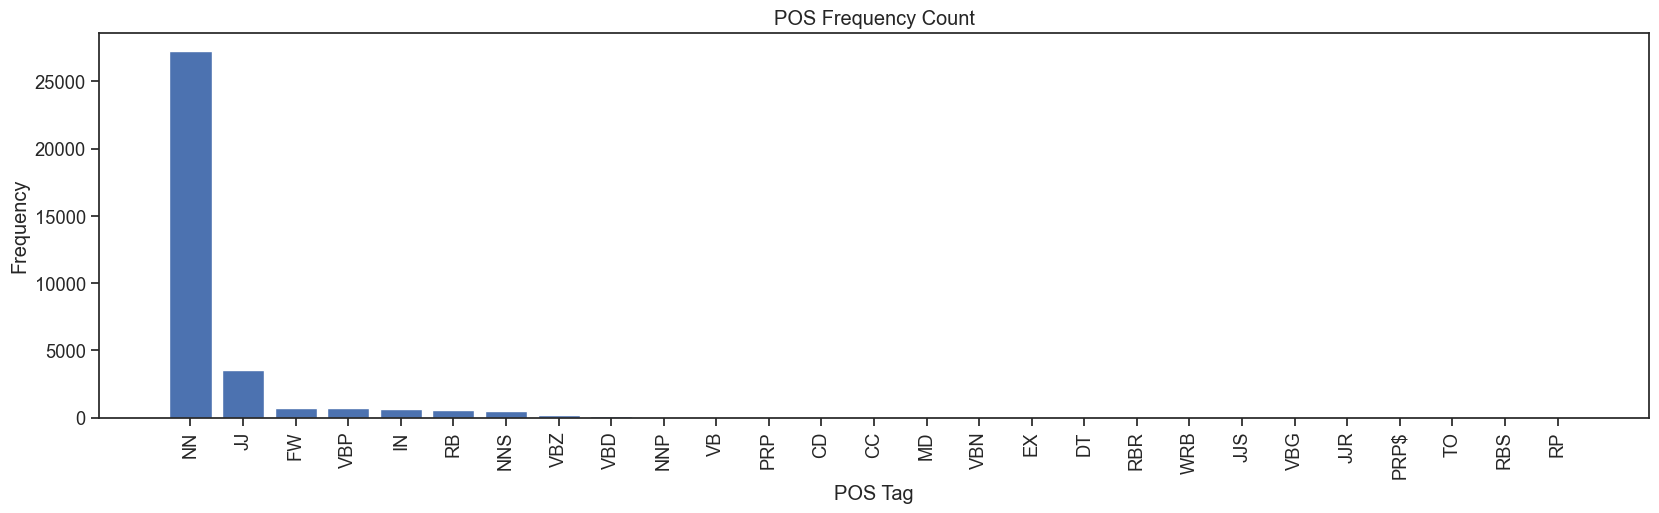

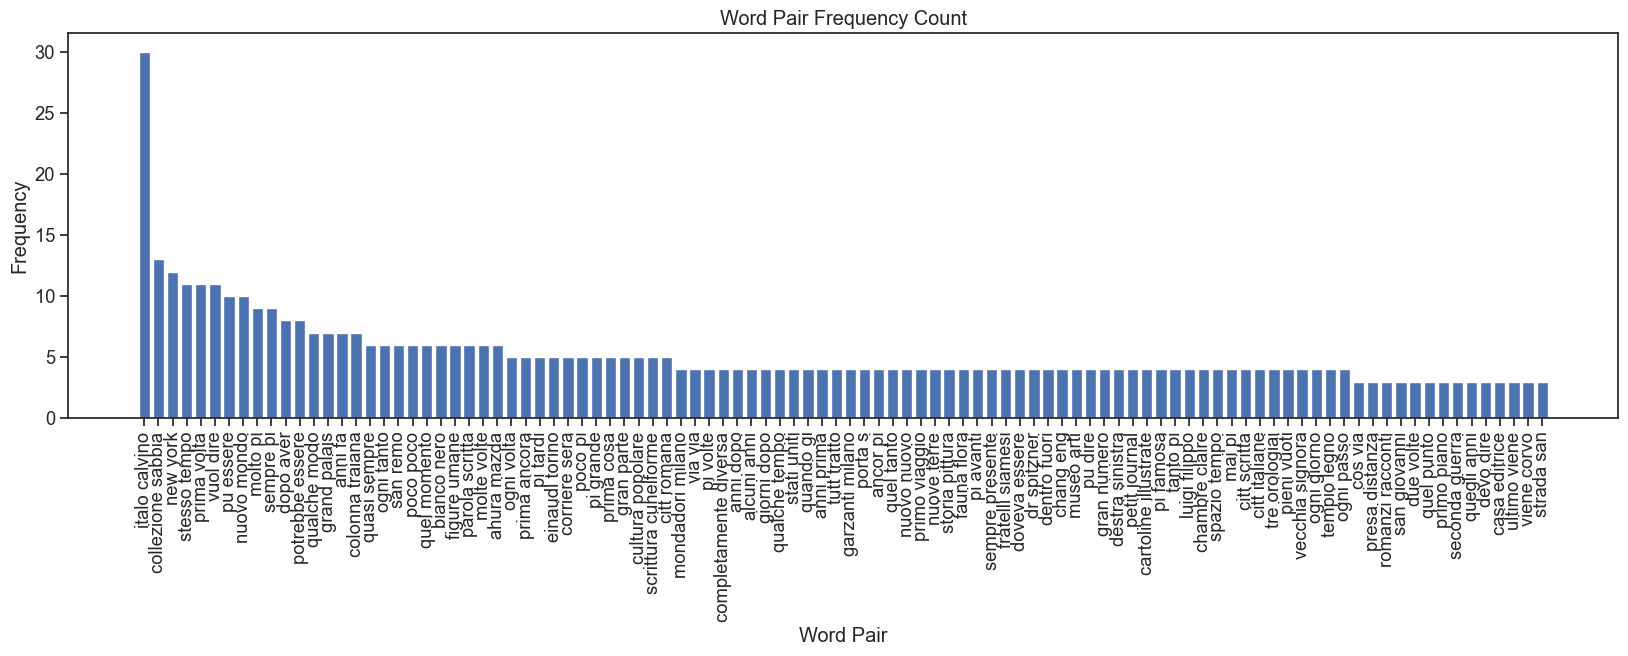

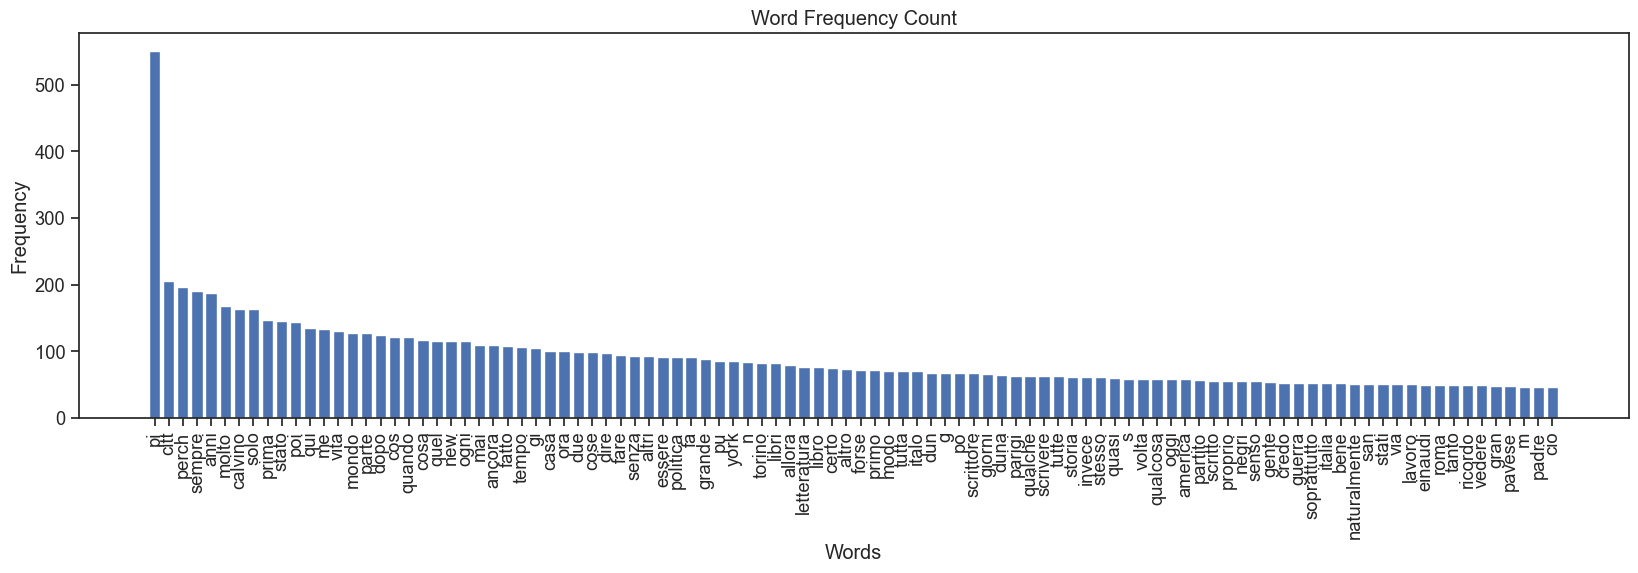

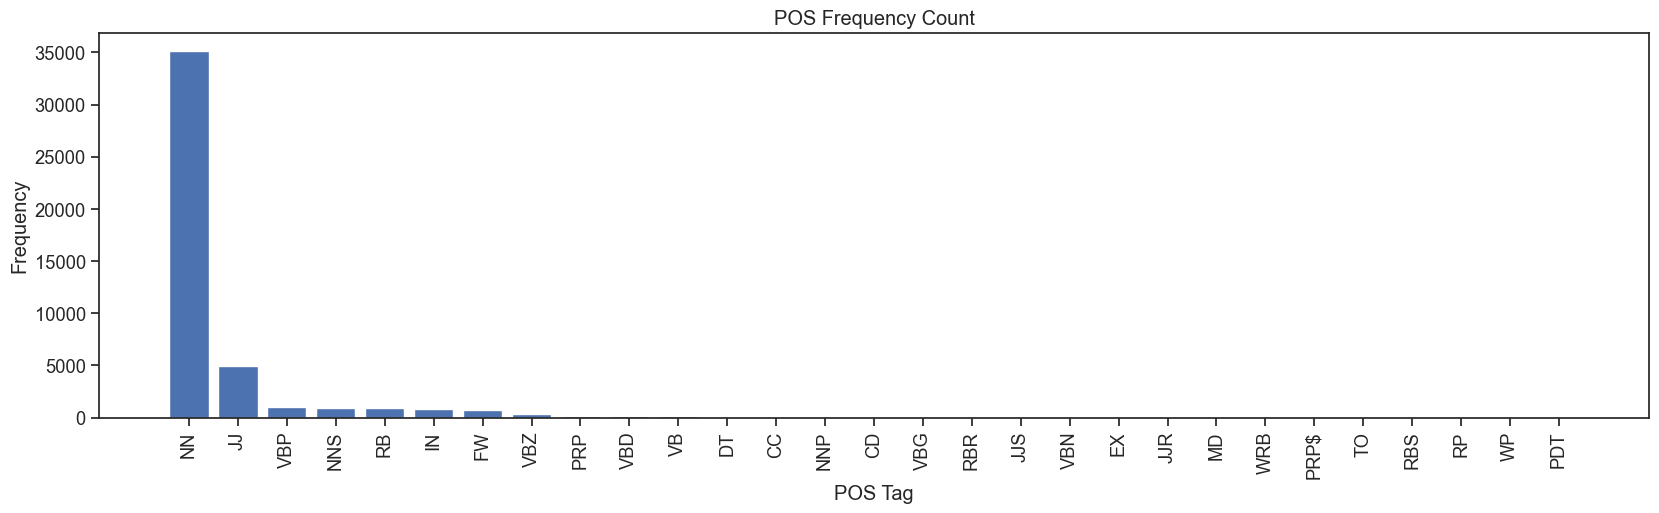

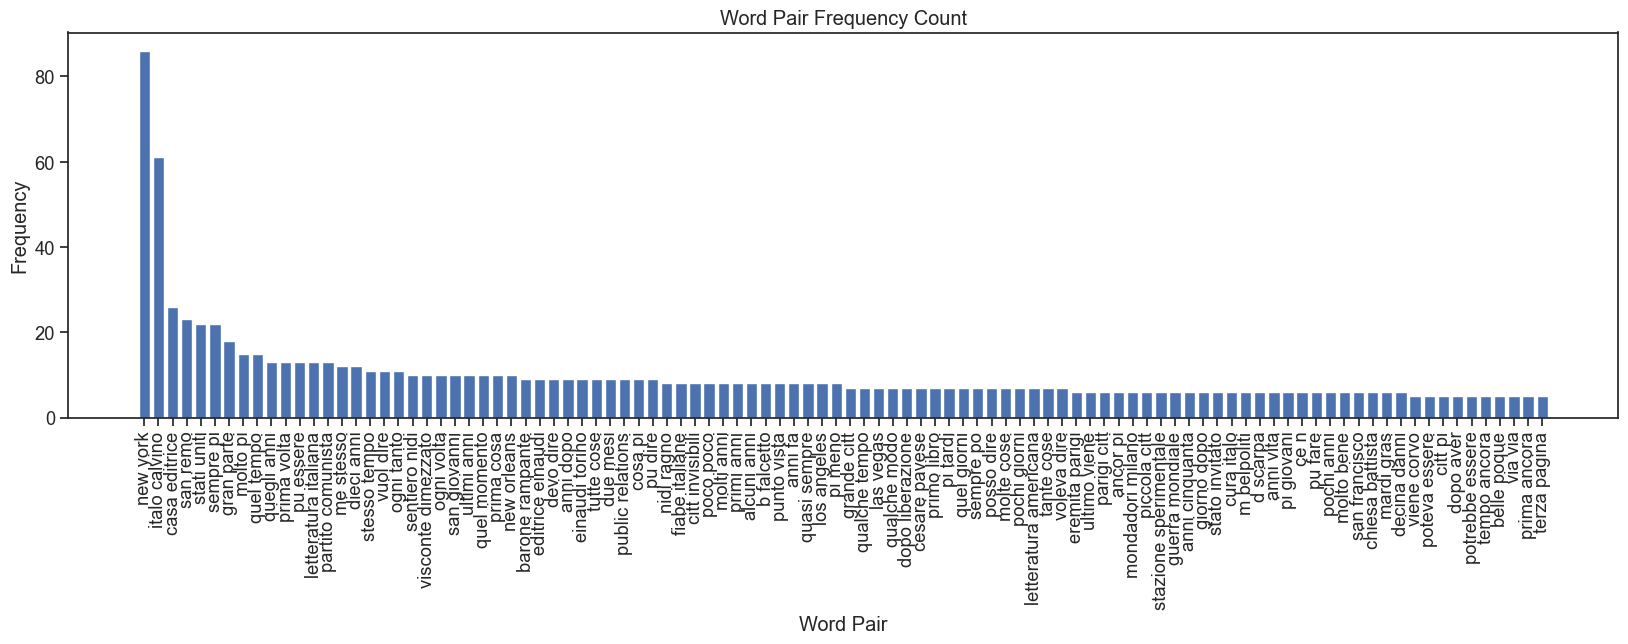

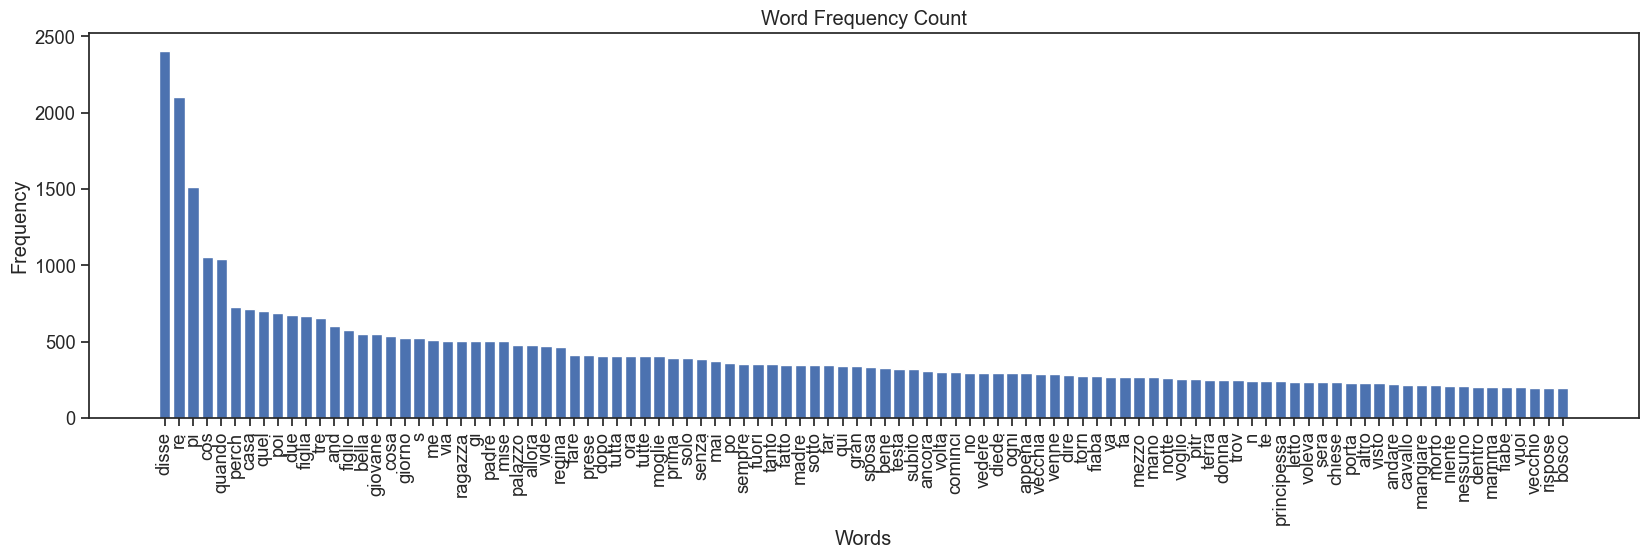

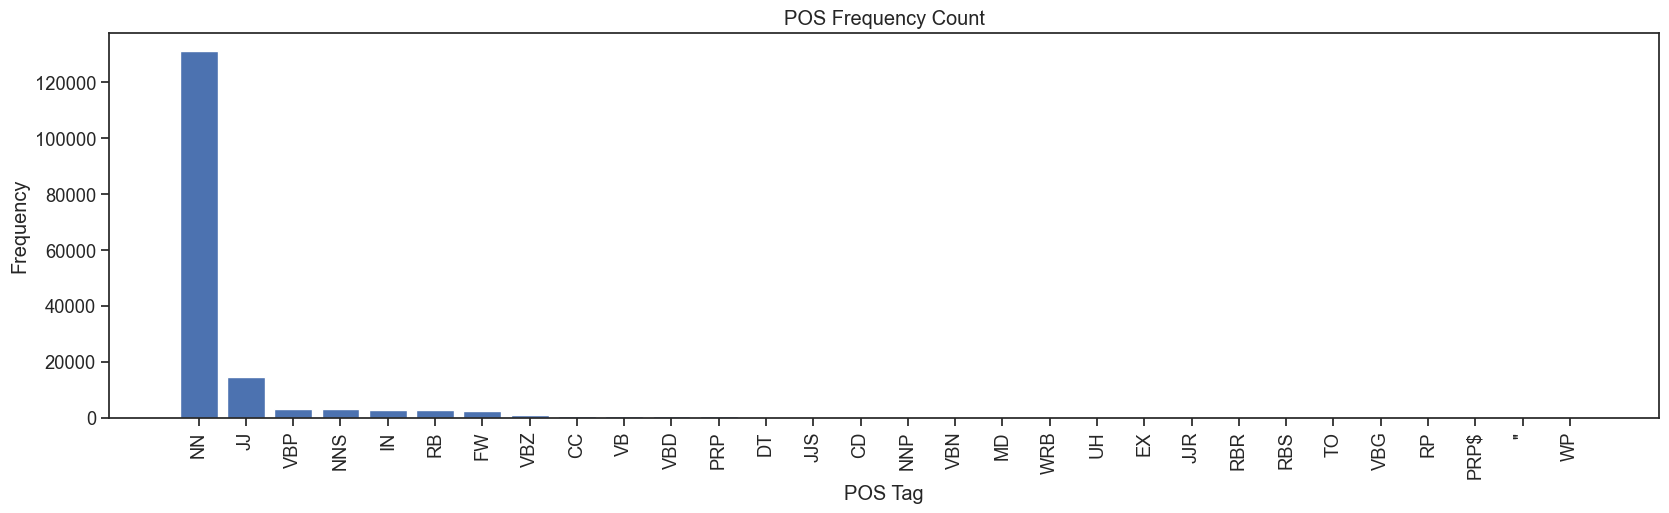

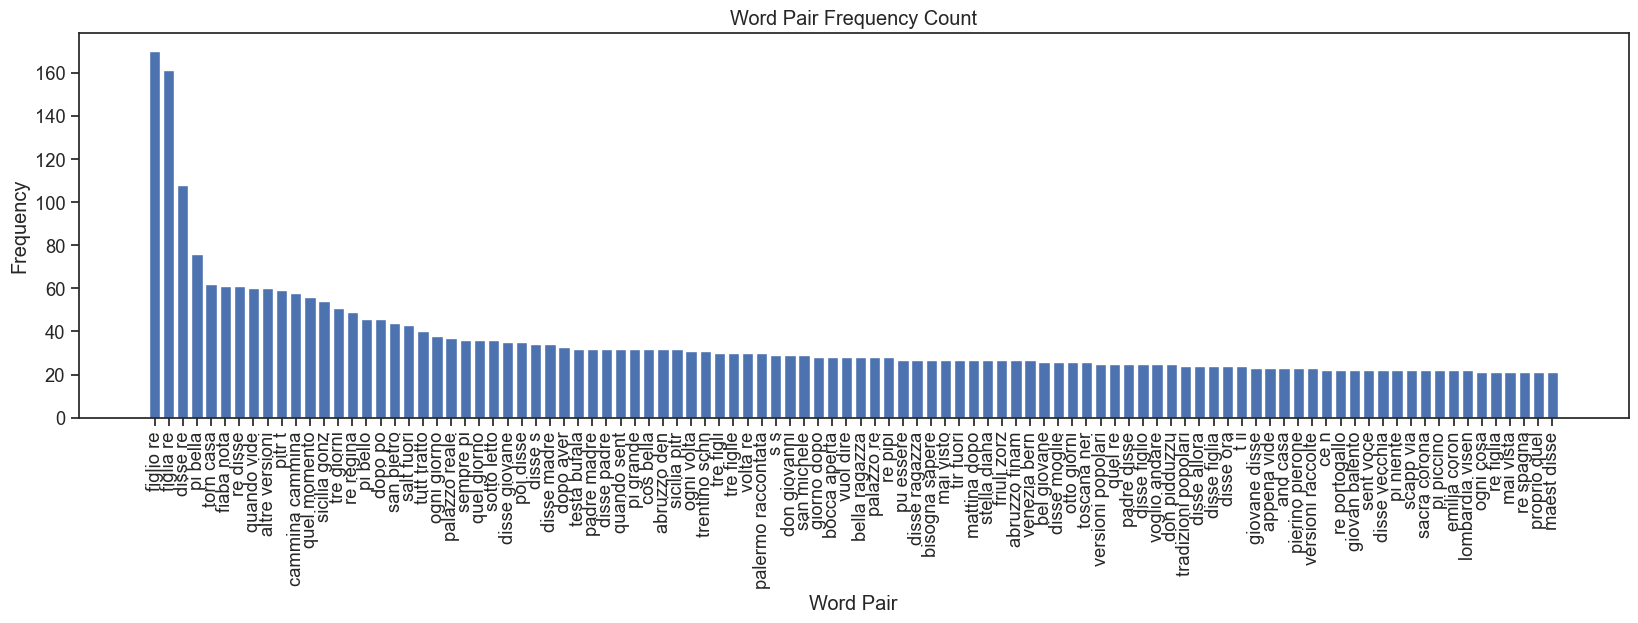

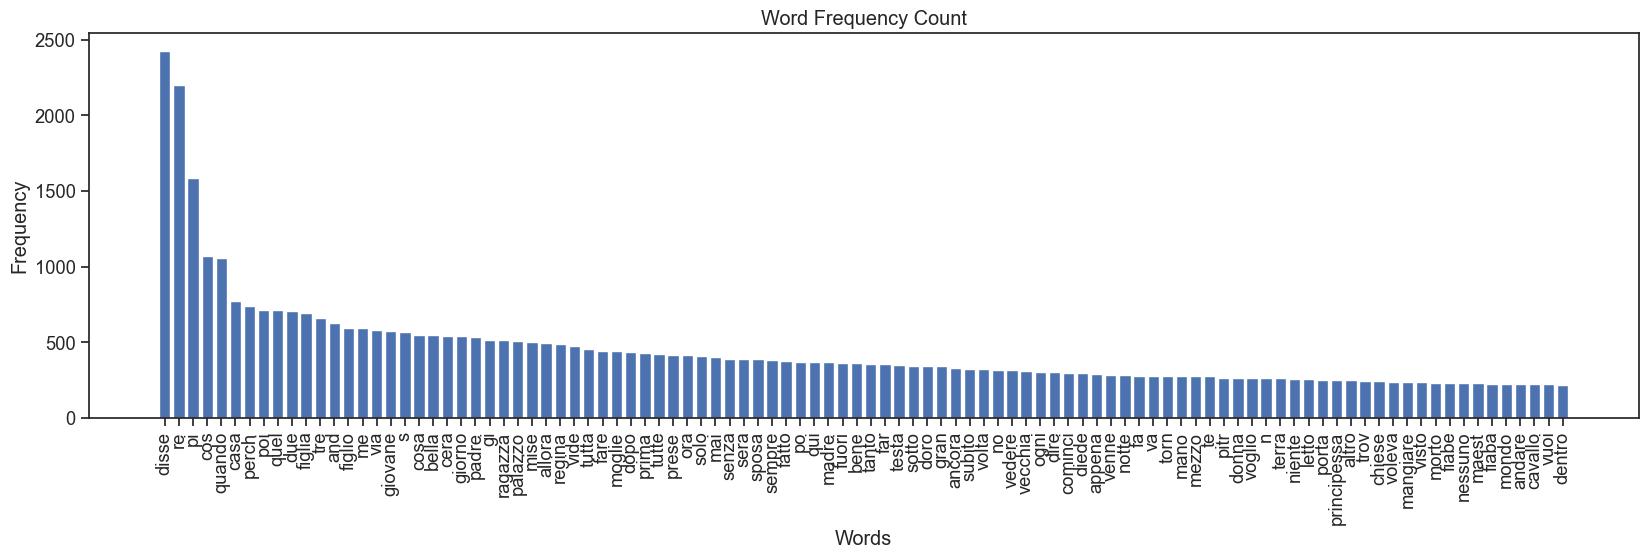

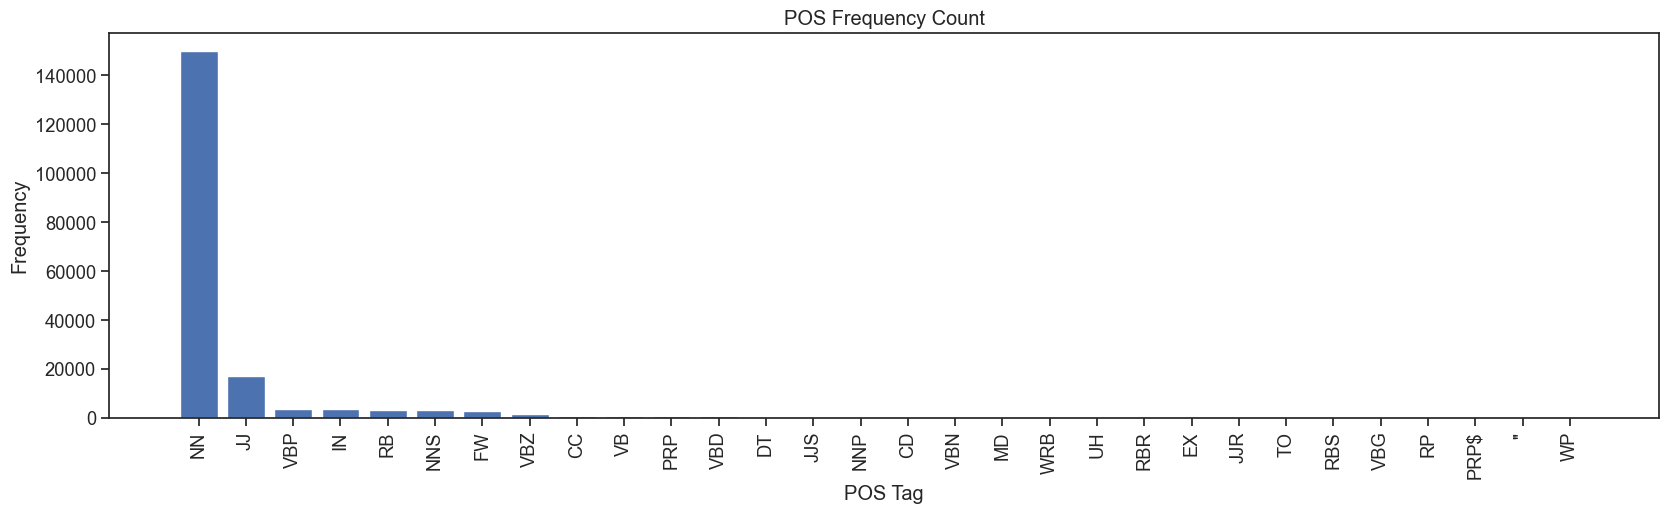

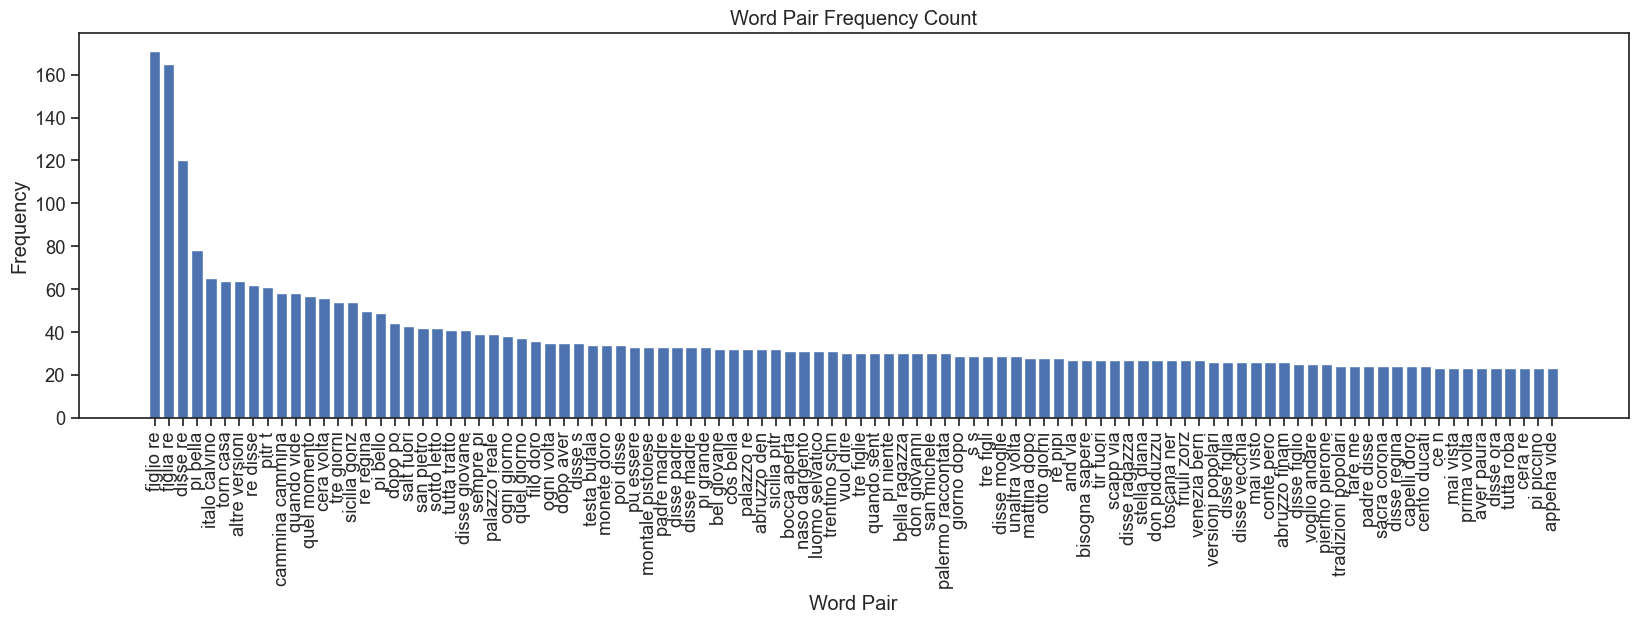

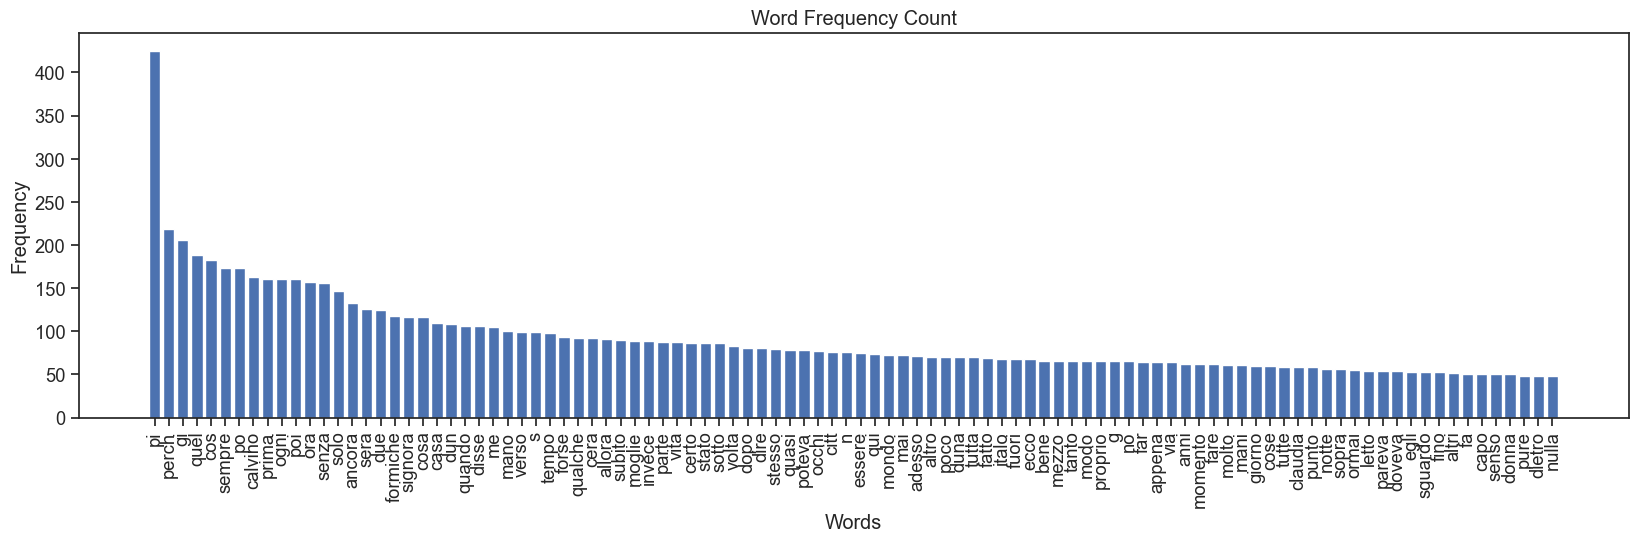

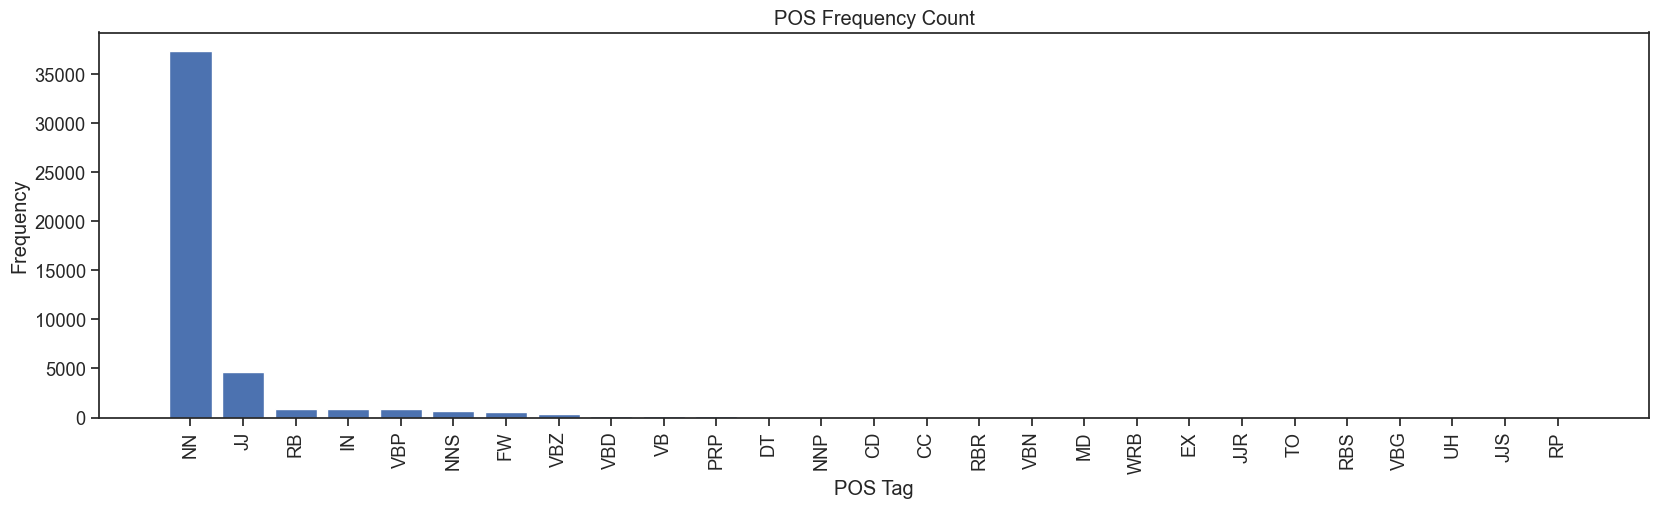

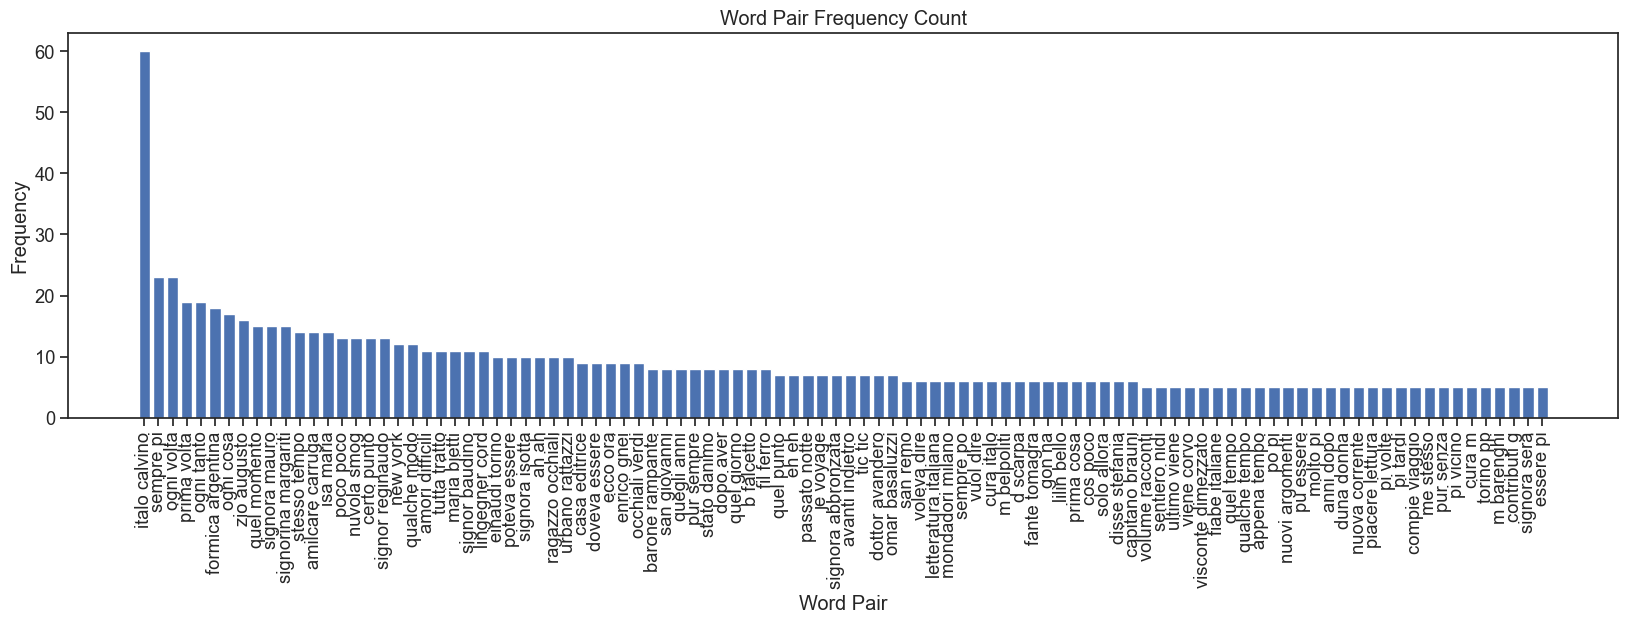

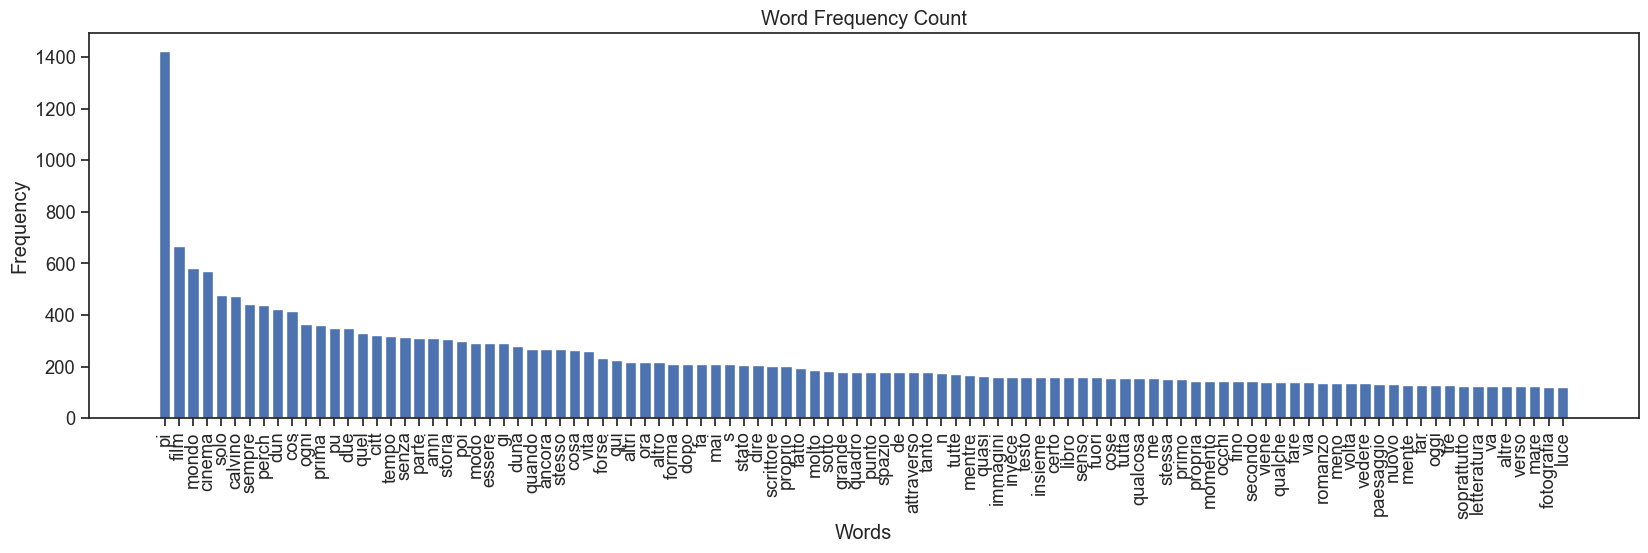

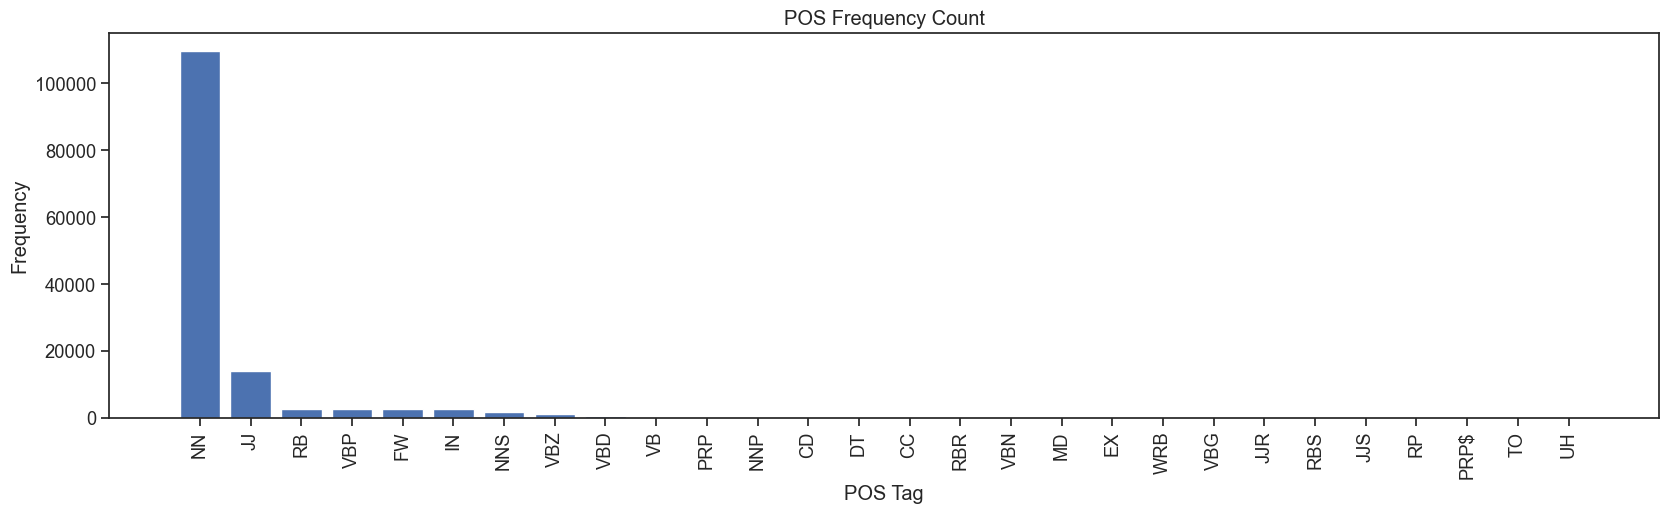

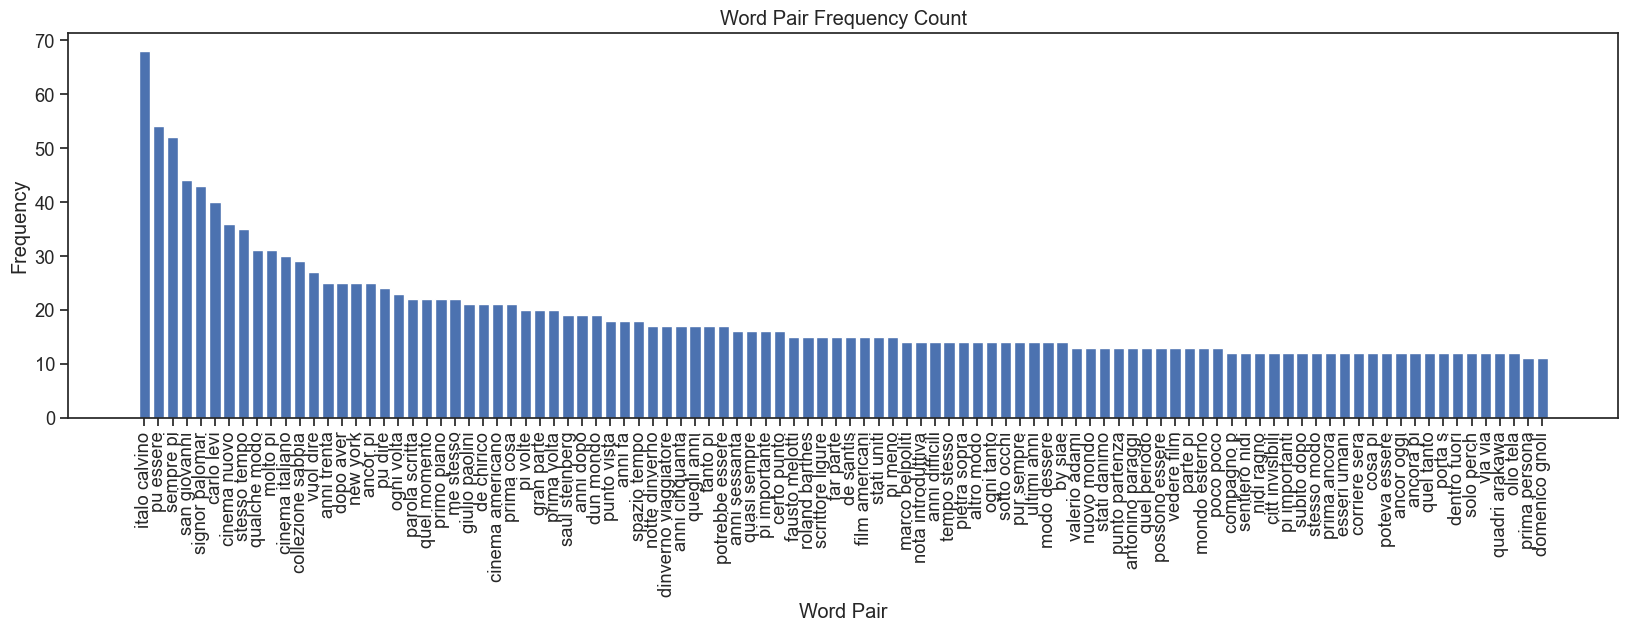

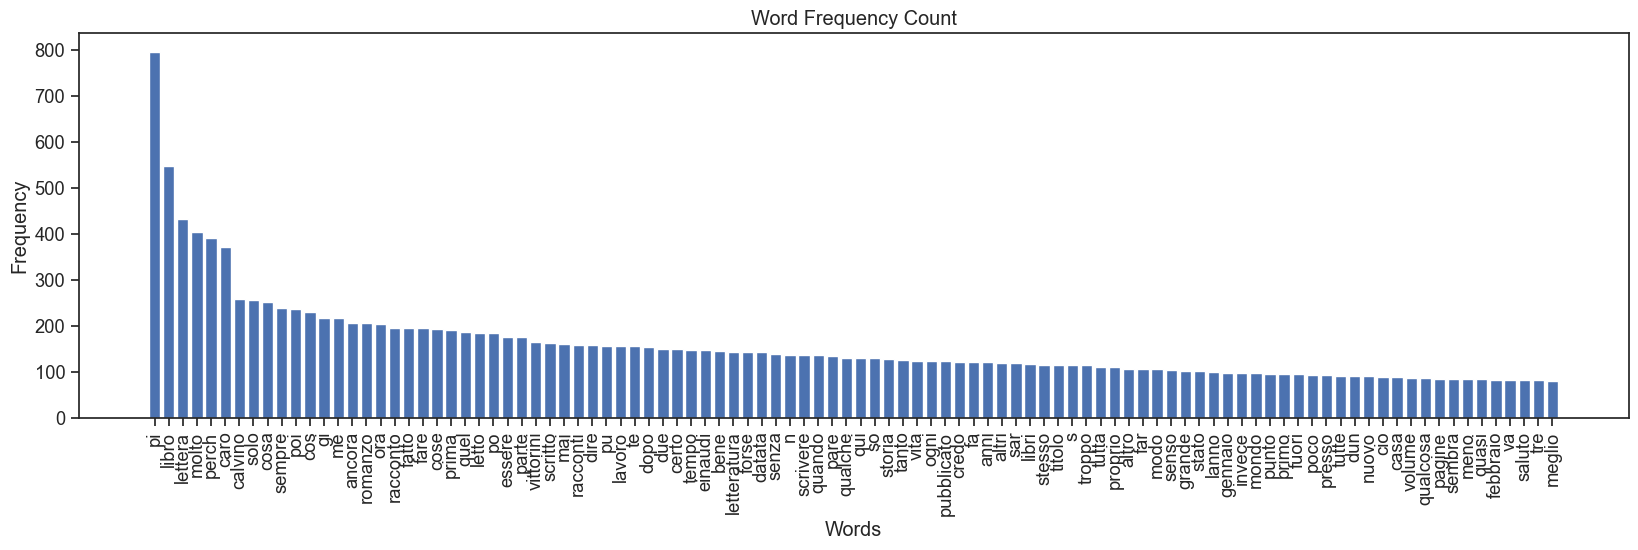

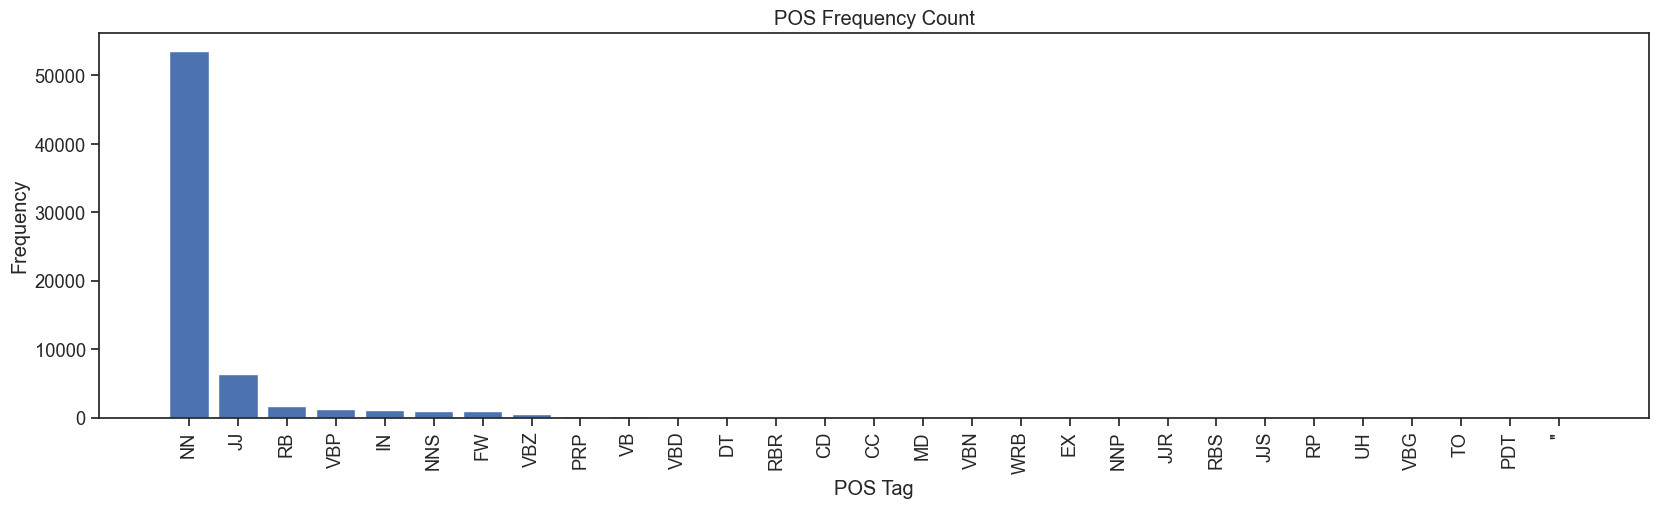

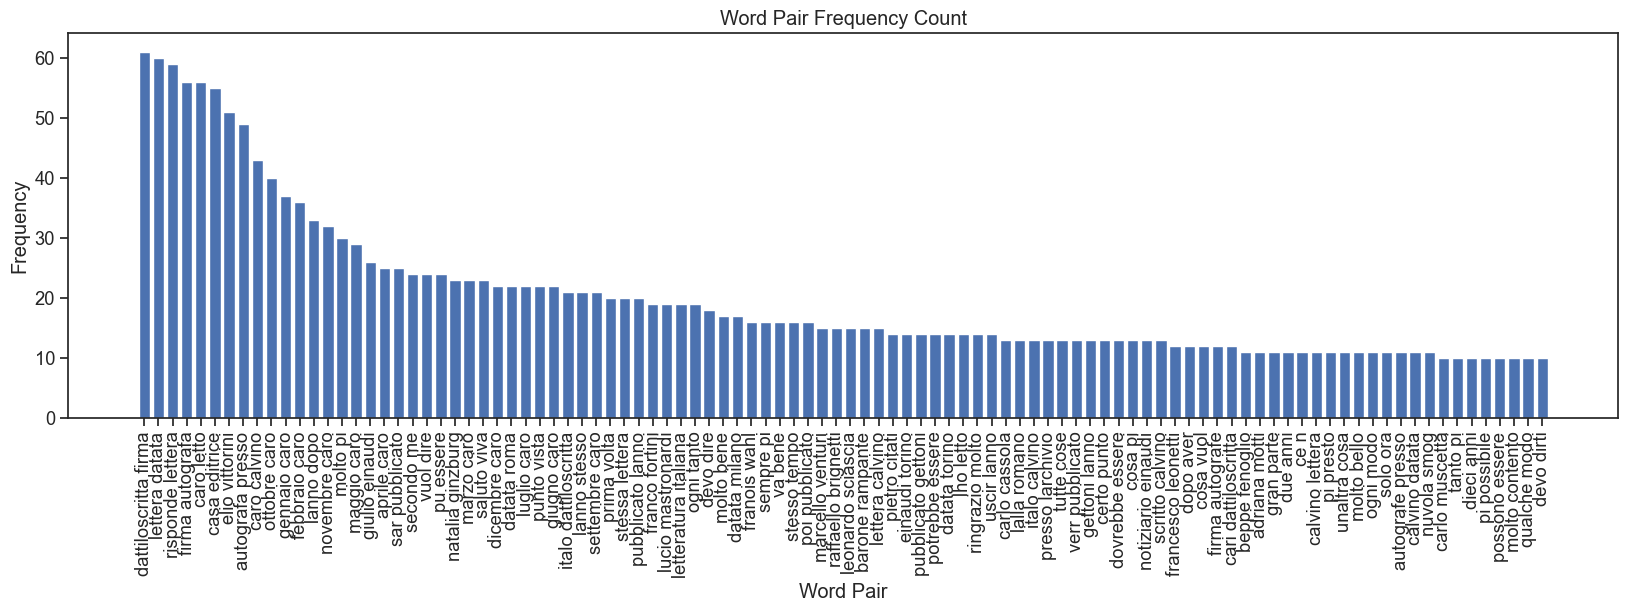

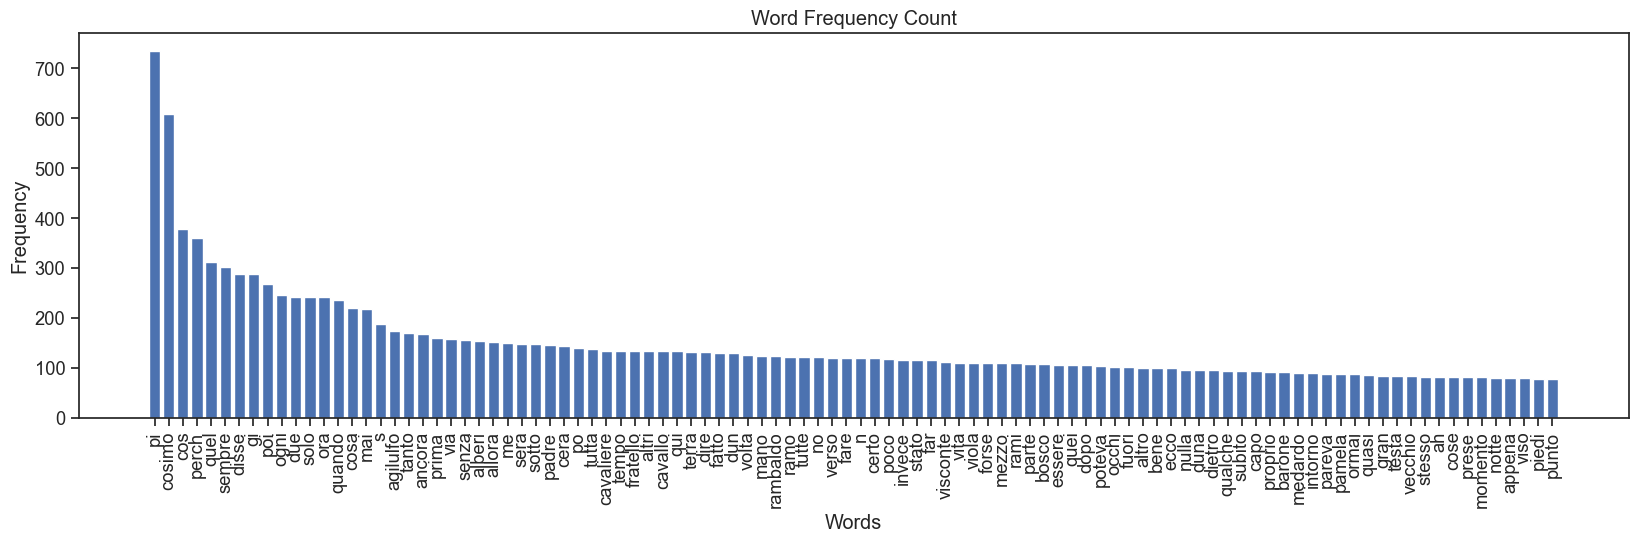

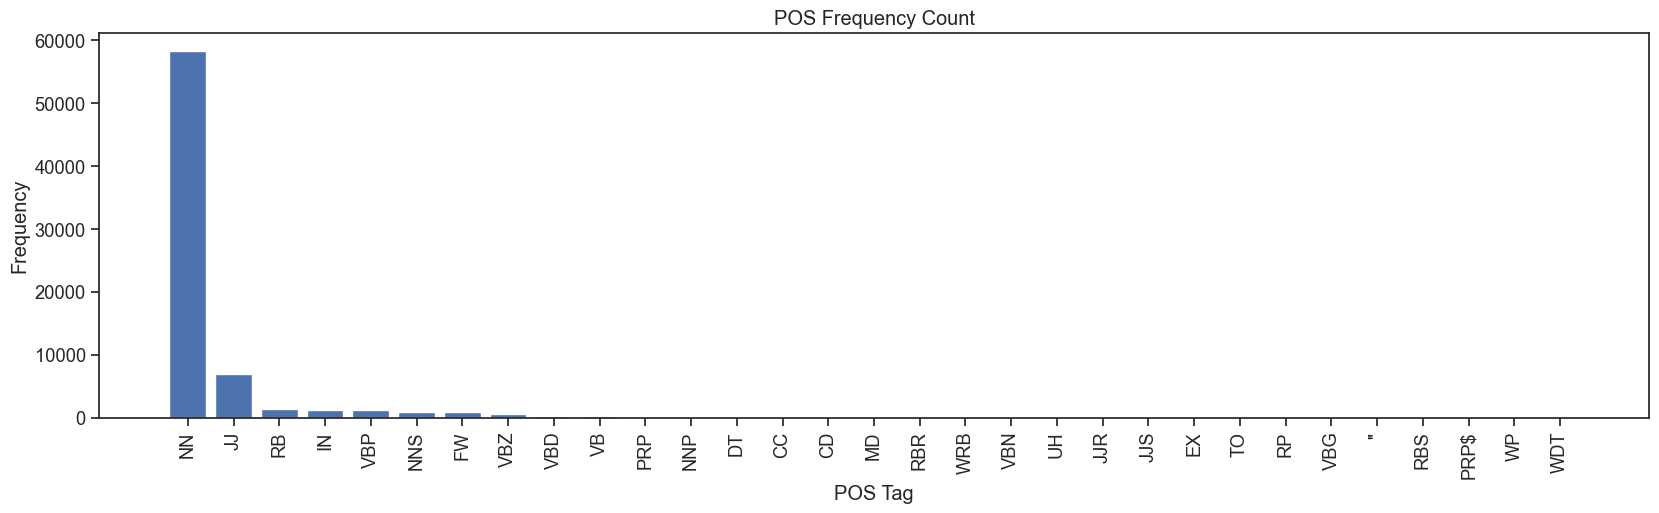

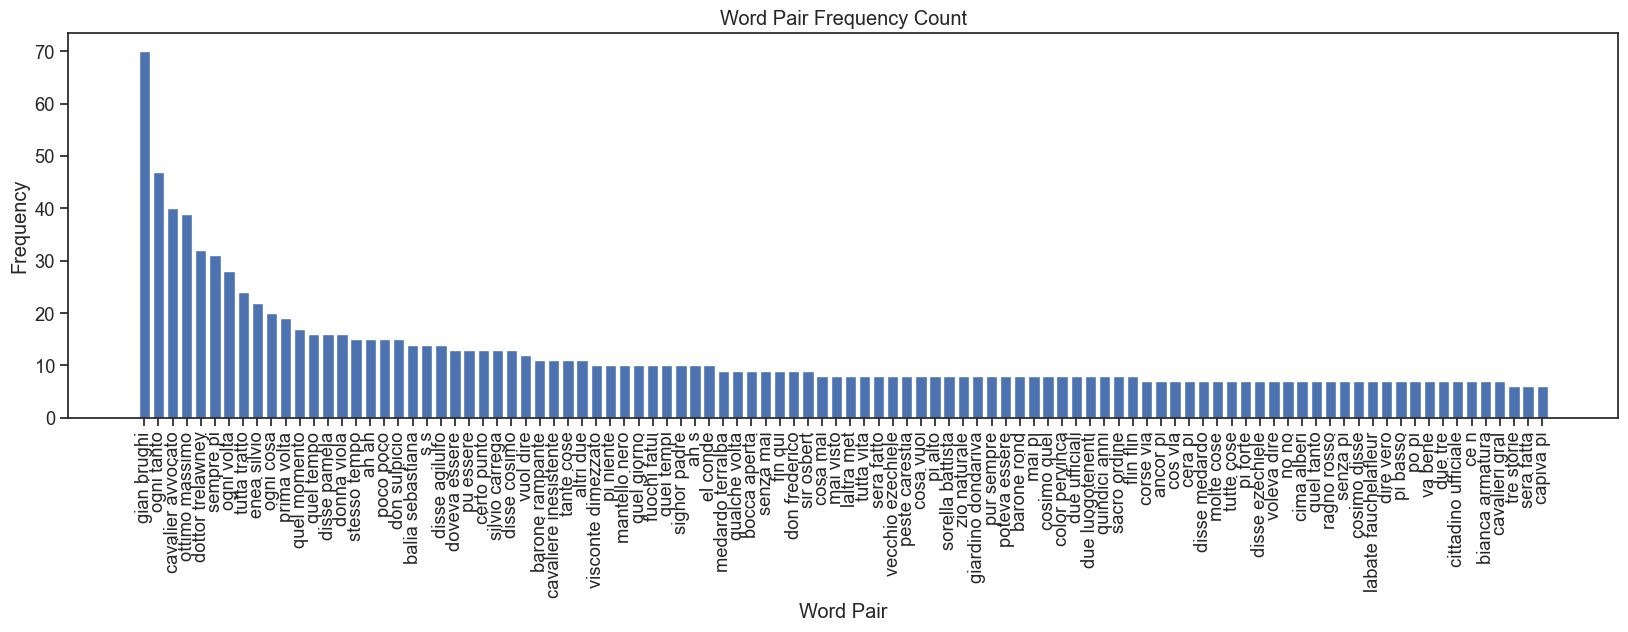

In [68]:
for text_file in tqdm(text_files):
    try:
        text_df = pd.read_csv(text_file)
        sentences = text_df['Sentence']

        freq_dist = FreqDist()
        counts = Counter()
        word_pair_counts = Counter()

        # Tokenize the novel
        for s in tqdm(sentences):
            if not isinstance(s, str):
                continue 
            tokens = word_tokenize(s)
            # Convert the tokens to lower case
            tokens = [word.lower() for word in tokens]
            # Remove punctuation and numbers
            tokens = [word for word in tokens if word.isalpha()]
            # Remove stopwords
            stop_words = set(stopwords.words('italian'))
            tokens = [word for word in tokens if word not in stop_words]

            # Get the frequency distribution of the words
            freq_dist.update(tokens)

            # Get the types of words
            tagged = pos_tag(tokens)
            counts.update([x[1] for x in tagged])

            # Generate bigrams (word pairs)
            word_pairs = list(bigrams(tokens))
            # Count the frequency of each word pair
            word_pair_counts.update(word_pairs)


        # Separate the words and their frequencies
        common_words = freq_dist.most_common(100)
        words = [word for word, freq in common_words]
        frequencies = [freq for word, freq in common_words]

        # Create a bar chart
        plt.figure(figsize=(20, 5))
        plt.bar(words, frequencies)
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Word Frequency Count')
        plt.xticks(rotation=90)
        plt.savefig(text_file.replace('.csv', '.png'), dpi=300)

        # Separate the words and their frequencies
        common_words = counts.most_common(100)
        words = [word for word, freq in common_words]
        frequencies = [freq for word, freq in common_words]

        # Create a bar chart
        plt.figure(figsize=(20, 5))
        plt.bar(words, frequencies)
        plt.xlabel('POS Tag')
        plt.ylabel('Frequency')
        plt.title('POS Frequency Count')
        plt.xticks(rotation=90)
        plt.savefig(text_file.replace('.csv', '_pos.png'), dpi=300)


        # Separate the words and their frequencies
        common_words = word_pair_counts.most_common(100)
        words = [' '.join(word) for word, freq in common_words]
        frequencies = [freq for word, freq in common_words]

        # Create a bar chart
        plt.figure(figsize=(20, 5))
        plt.bar(words, frequencies)
        plt.xlabel('Word Pair')  
        plt.ylabel('Frequency')
        plt.title('Word Pair Frequency Count')
        plt.xticks(rotation=90)
        plt.savefig(text_file.replace('.csv', '_word_pair.png'), dpi=300)
    except Exception as e:
        print(f'[WARN] Skip {text_file} due to {e}')
        continue


# Run LDA with Mallet

In [69]:
import os

In [70]:
ITALIAN_STOP_WORDS = ['e', 'a', 'i', 'o', 'ho', 'hai', 'ha', 'abbiamo', 'avete', 'hanno', 'ad', 'al', 'con', 'per', 'tra', 'in', 
                      'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 
                      'anche', 'come', 'dove', 'quando', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta',
                      'quante', 'quello', 'quella', 'quelli', 'quelle', 'questo', 'questa', 'questi', 'queste', 'si', 'tutto', 
                      'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'abbiamo', 'avete', 'hanno', 'sono', 'sei', 'è', 
                      'siamo', 'siete', 'sono']

In [71]:
text_files = [os.path.join('./results/', x) for x in os.listdir('./results/') if x.endswith('.csv')] 

In [28]:
pip install little_mallet_wrapper

  Obtaining dependency information for little_mallet_wrapper from https://files.pythonhosted.org/packages/e3/01/7e8561e33e79b408d9526b22b50e20bfdd8e551979237ad5c972759fe7d8/little_mallet_wrapper-0.5.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [72]:
from little_mallet_wrapper import process_string
text_df = pd.read_csv('results/Collezione di sabbia.csv', encoding='utf-8')
print('Sentence' in text_df.columns)

True


In [73]:
import os
import pandas as pd
from tqdm import tqdm

# 假设 text_files 是包含 CSV 文件路径的列表
# text_files = ["file1.csv", "file2.csv", ...]

for text_file in tqdm(text_files):
    try:
        # 读取CSV文件，使用UTF-8编码
        text_df = pd.read_csv(text_file, encoding='utf-8')
        print(f"Successfully loaded {text_file}")
    except Exception as e:
        print(f"Error loading file {text_file}: {e}")
        continue
    
    # 打印列名以确认读取的列名是否正确
    print(f"Columns in file {text_file}: {text_df.columns.tolist()}")
    
    # 清理列名，去除空格并转换为小写
    text_df.columns = text_df.columns.str.strip().str.lower()
    
    # 检查并获取 'sentence' 列
    if 'sentence' in text_df.columns:
        sentences = text_df['sentence']
        print(f"Processing {len(sentences)} sentences from {text_file}")
    else:
        print(f"Column 'Sentence' not found in file {text_file}")
        continue
    
    # 处理意大利语文本
    processed_sentences = []

    for s in sentences:
        if not isinstance(s, str):  # 检查是否为字符串（处理 NaN）
            continue 
        preprocessed_text = process_string(
            s,
            lowercase=True,
            remove_short_words=True,
            remove_stop_words=True,
            remove_punctuation=True,
            numbers='replace',
            stop_words=ITALIAN_STOP_WORDS,
            stop_words_extra=[],
        )
        processed_sentences.append(preprocessed_text)
    
    if len(processed_sentences) == 0:
        continue
    
    # 将处理后的文本导出到本地 txt 文件
    sub_dir = ''.join([x for x in text_file.split('/')[-1].split('.')[0] if x.isalpha()])
    exported_path = os.path.join('.', 'book_txt_files', sub_dir)
    os.makedirs(exported_path, exist_ok=True)
    exported_path = os.path.join(exported_path, 'text.txt')
    
    with open(exported_path, 'w+', encoding='utf-8') as f:
        f.writelines('\n'.join(processed_sentences))
    
    # 定义 Mallet 路径和命令
    mallet_path = '.\\Mallet-202108\\bin\\mallet'
    input_directory = os.path.join('.', 'book_txt_files', sub_dir)
    output_file = 'test.mallet'
    output_topic_keys = os.path.join(input_directory, 'topic_keys.10')
    topic_word_weights = os.path.join(input_directory, 'topic_key_weights')
    num_topics = 20
    num_top_words = 5
    
    # 定义 Mallet 命令
    import_command = f'{mallet_path} import-dir --input {input_directory} --output {output_file} --keep-sequence'
    train_command = f'{mallet_path} train-topics --input {output_file} --output-topic-keys {output_topic_keys} --num-topics {num_topics} --num-top-words {num_top_words} --topic-word-weights-file {topic_word_weights}'
    
    # 运行 Mallet 命令
    output = subprocess.run(train_command.split(' '), shell=True, capture_output=True)
    print(output.stderr.decode('utf8'))


  0%|          | 0/49 [00:00<?, ?it/s]

Successfully loaded ./results/Collezione di sabbia.csv
Columns in file ./results/Collezione di sabbia.csv: ['Sentence', 'Emotion']
Processing 1340 sentences from ./results/Collezione di sabbia.csv


  2%|▏         | 1/49 [00:00<00:32,  1.47it/s]


Successfully loaded ./results/Eremita a Parigi.csv
Columns in file ./results/Eremita a Parigi.csv: ['Sentence', 'Emotion']
Processing 2403 sentences from ./results/Eremita a Parigi.csv


  4%|▍         | 2/49 [00:01<00:40,  1.17it/s]


Successfully loaded ./results/Fiabe italiane. Raccolte e trascritte da Italo Calvino.csv
Columns in file ./results/Fiabe italiane. Raccolte e trascritte da Italo Calvino.csv: ['Sentence', 'Emotion']
Processing 15096 sentences from ./results/Fiabe italiane. Raccolte e trascritte da Italo Calvino.csv


  6%|▌         | 3/49 [00:03<00:59,  1.30s/it]


Successfully loaded ./results/Fiabe italiane.csv
Columns in file ./results/Fiabe italiane.csv: ['Sentence', 'Emotion']
Processing 15126 sentences from ./results/Fiabe italiane.csv


  8%|▊         | 4/49 [00:05<01:13,  1.64s/it]


Successfully loaded ./results/Gli amori difficili.csv
Columns in file ./results/Gli amori difficili.csv: ['Sentence', 'Emotion']
Processing 2585 sentences from ./results/Gli amori difficili.csv


 10%|█         | 5/49 [00:06<00:57,  1.30s/it]


Successfully loaded ./results/Guardare.csv
Columns in file ./results/Guardare.csv: ['Sentence', 'Emotion']
Processing 5731 sentences from ./results/Guardare.csv


 12%|█▏        | 6/49 [00:08<01:09,  1.61s/it]


Successfully loaded ./results/I libri degli altri.csv
Columns in file ./results/I libri degli altri.csv: ['Sentence', 'Emotion']
Processing 4583 sentences from ./results/I libri degli altri.csv


 14%|█▍        | 7/49 [00:09<01:00,  1.44s/it]


Successfully loaded ./results/I nostri antenati.csv
Columns in file ./results/I nostri antenati.csv: ['Sentence', 'Emotion']
Processing 4744 sentences from ./results/I nostri antenati.csv


 16%|█▋        | 8/49 [00:10<00:55,  1.35s/it]


Successfully loaded ./results/I Racconti.csv
Columns in file ./results/I Racconti.csv: ['Sentence', 'Emotion']
Processing 6493 sentences from ./results/I Racconti.csv


 18%|█▊        | 9/49 [00:13<01:04,  1.62s/it]


Successfully loaded ./results/Il barone rampante.csv
Columns in file ./results/Il barone rampante.csv: ['Sentence', 'Emotion']
Processing 2757 sentences from ./results/Il barone rampante.csv


 20%|██        | 10/49 [00:14<00:57,  1.47s/it]


Successfully loaded ./results/Il castello dei destini incrociati.csv
Columns in file ./results/Il castello dei destini incrociati.csv: ['Sentence', 'Emotion']
Processing 1092 sentences from ./results/Il castello dei destini incrociati.csv


 22%|██▏       | 11/49 [00:14<00:47,  1.25s/it]


Successfully loaded ./results/Il cavaliere inesistente.csv
Columns in file ./results/Il cavaliere inesistente.csv: ['Sentence', 'Emotion']
Processing 1355 sentences from ./results/Il cavaliere inesistente.csv


 24%|██▍       | 12/49 [00:15<00:37,  1.02s/it]


Successfully loaded ./results/Il libro dei risvolti.csv
Columns in file ./results/Il libro dei risvolti.csv: ['Sentence', 'Emotion']
Processing 1742 sentences from ./results/Il libro dei risvolti.csv


 27%|██▋       | 13/49 [00:16<00:42,  1.18s/it]


Successfully loaded ./results/Il principe granchio e altre fiabe italiane.csv
Columns in file ./results/Il principe granchio e altre fiabe italiane.csv: ['Sentence', 'Emotion']
Processing 1866 sentences from ./results/Il principe granchio e altre fiabe italiane.csv


 29%|██▊       | 14/49 [00:17<00:33,  1.05it/s]


Successfully loaded ./results/Il sentiero dei nidi di ragno.csv
Columns in file ./results/Il sentiero dei nidi di ragno.csv: ['Sentence', 'Emotion']
Processing 3160 sentences from ./results/Il sentiero dei nidi di ragno.csv


 31%|███       | 15/49 [00:18<00:32,  1.05it/s]


Successfully loaded ./results/Il teatro dei ventagli.csv
Columns in file ./results/Il teatro dei ventagli.csv: ['Sentence', 'Emotion']
Processing 1188 sentences from ./results/Il teatro dei ventagli.csv


 33%|███▎      | 16/49 [00:18<00:27,  1.20it/s]


Successfully loaded ./results/Il visconte dimezzato.csv
Columns in file ./results/Il visconte dimezzato.csv: ['Sentence', 'Emotion']
Processing 969 sentences from ./results/Il visconte dimezzato.csv


 35%|███▍      | 17/49 [00:19<00:21,  1.46it/s]


Successfully loaded ./results/L'illuminismo mio e tuo.csv
Columns in file ./results/L'illuminismo mio e tuo.csv: ['Sentence', 'Emotion']
Processing 2139 sentences from ./results/L'illuminismo mio e tuo.csv


 37%|███▋      | 18/49 [00:19<00:18,  1.67it/s]


Successfully loaded ./results/L'Uccel Belverde E Altre Fiabe Italiane.csv
Columns in file ./results/L'Uccel Belverde E Altre Fiabe Italiane.csv: ['Sentence', 'Emotion']
Processing 24877 sentences from ./results/L'Uccel Belverde E Altre Fiabe Italiane.csv


 41%|████      | 20/49 [00:23<00:32,  1.13s/it]


Successfully loaded ./results/La foresta-radice-labirinto.csv
Columns in file ./results/La foresta-radice-labirinto.csv: ['Sentence', 'Emotion']
Processing 173 sentences from ./results/La foresta-radice-labirinto.csv

Successfully loaded ./results/La giornata d’uno scrutatore.csv
Columns in file ./results/La giornata d’uno scrutatore.csv: ['Sentence', 'Emotion']
Processing 1050 sentences from ./results/La giornata d’uno scrutatore.csv


 43%|████▎     | 21/49 [00:24<00:30,  1.07s/it]


Successfully loaded ./results/La memoria del mondo e altre storie cosmicomiche.csv
Columns in file ./results/La memoria del mondo e altre storie cosmicomiche.csv: ['Sentence', 'Emotion']
Processing 2446 sentences from ./results/La memoria del mondo e altre storie cosmicomiche.csv


 45%|████▍     | 22/49 [00:26<00:33,  1.24s/it]


Successfully loaded ./results/La nuvola di smog — La formica argentina.csv
Columns in file ./results/La nuvola di smog — La formica argentina.csv: ['Sentence', 'Emotion']
Processing 1341 sentences from ./results/La nuvola di smog — La formica argentina.csv


 47%|████▋     | 23/49 [00:26<00:29,  1.12s/it]


Successfully loaded ./results/La speculazione edilizia.csv
Columns in file ./results/La speculazione edilizia.csv: ['Sentence', 'Emotion']
Processing 1564 sentences from ./results/La speculazione edilizia.csv


 49%|████▉     | 24/49 [00:27<00:25,  1.02s/it]


Successfully loaded ./results/La strada di San Giovanni.csv
Columns in file ./results/La strada di San Giovanni.csv: ['Sentence', 'Emotion']
Processing 818 sentences from ./results/La strada di San Giovanni.csv


 51%|█████     | 25/49 [00:28<00:22,  1.07it/s]


Successfully loaded ./results/Le città invisibili.csv
Columns in file ./results/Le città invisibili.csv: ['Sentence', 'Emotion']
Processing 1081 sentences from ./results/Le città invisibili.csv


 53%|█████▎    | 26/49 [00:29<00:19,  1.20it/s]


Successfully loaded ./results/Le Cosmicomiche.csv
Columns in file ./results/Le Cosmicomiche.csv: ['Sentence', 'Emotion']
Processing 1723 sentences from ./results/Le Cosmicomiche.csv


 55%|█████▌    | 27/49 [00:29<00:16,  1.31it/s]


Successfully loaded ./results/Le più belle fiabe popolari italiane.csv
Columns in file ./results/Le più belle fiabe popolari italiane.csv: ['Sentence', 'Emotion']
Processing 8353 sentences from ./results/Le più belle fiabe popolari italiane.csv


 57%|█████▋    | 28/49 [00:33<00:32,  1.57s/it]


Successfully loaded ./results/Lentrata in guerra.csv
Columns in file ./results/Lentrata in guerra.csv: ['Sentence', 'Emotion']
Processing 1268 sentences from ./results/Lentrata in guerra.csv


 59%|█████▉    | 29/49 [00:33<00:26,  1.33s/it]


Successfully loaded ./results/Lettere a Chichita 1962-1963.csv
Columns in file ./results/Lettere a Chichita 1962-1963.csv: ['Sentence', 'Emotion']
Processing 841 sentences from ./results/Lettere a Chichita 1962-1963.csv


 61%|██████    | 30/49 [00:34<00:19,  1.04s/it]


Successfully loaded ./results/Lettere.csv
Columns in file ./results/Lettere.csv: ['Sentence', 'Emotion']
Processing 17520 sentences from ./results/Lettere.csv


 63%|██████▎   | 31/49 [00:38<00:34,  1.92s/it]


Successfully loaded ./results/Lezioni americane. Sei proposte per il prossimo millennio.csv
Columns in file ./results/Lezioni americane. Sei proposte per il prossimo millennio.csv: ['Sentence', 'Emotion']
Processing 1019 sentences from ./results/Lezioni americane. Sei proposte per il prossimo millennio.csv


 65%|██████▌   | 32/49 [00:38<00:24,  1.46s/it]


Successfully loaded ./results/Marcovaldo ovvero Le stagioni in città.csv
Columns in file ./results/Marcovaldo ovvero Le stagioni in città.csv: ['Sentence', 'Emotion']
Processing 1741 sentences from ./results/Marcovaldo ovvero Le stagioni in città.csv


 67%|██████▋   | 33/49 [00:38<00:18,  1.15s/it]


Successfully loaded ./results/Mondo scritto e mondo non scritto.csv
Columns in file ./results/Mondo scritto e mondo non scritto.csv: ['Sentence', 'Emotion']
Processing 2356 sentences from ./results/Mondo scritto e mondo non scritto.csv


 69%|██████▉   | 34/49 [00:39<00:16,  1.07s/it]


Successfully loaded ./results/Orlando Furioso di Ludovico Ariosto raccontato da Italo.csv
Columns in file ./results/Orlando Furioso di Ludovico Ariosto raccontato da Italo.csv: ['Sentence', 'Emotion']
Processing 1305 sentences from ./results/Orlando Furioso di Ludovico Ariosto raccontato da Italo.csv


 71%|███████▏  | 35/49 [00:40<00:14,  1.01s/it]


Successfully loaded ./results/Palomar.csv
Columns in file ./results/Palomar.csv: ['Sentence', 'Emotion']
Processing 1096 sentences from ./results/Palomar.csv


 73%|███████▎  | 36/49 [00:41<00:11,  1.15it/s]


Successfully loaded ./results/Perché leggere i classici.csv
Columns in file ./results/Perché leggere i classici.csv: ['Sentence', 'Emotion']
Processing 1994 sentences from ./results/Perché leggere i classici.csv


 76%|███████▌  | 37/49 [00:42<00:11,  1.00it/s]


Successfully loaded ./results/Prima che tu dica «Pronto».csv
Columns in file ./results/Prima che tu dica «Pronto».csv: ['Sentence', 'Emotion']
Processing 2730 sentences from ./results/Prima che tu dica «Pronto».csv


 78%|███████▊  | 38/49 [00:43<00:11,  1.00s/it]


Successfully loaded ./results/Racconti fantastici dell'Ottocento (Volume I).csv
Columns in file ./results/Racconti fantastici dell'Ottocento (Volume I).csv: ['Sentence', 'Emotion']
Processing 3182 sentences from ./results/Racconti fantastici dell'Ottocento (Volume I).csv


 80%|███████▉  | 39/49 [00:44<00:10,  1.04s/it]


Successfully loaded ./results/Romanzi e racconti.csv
Columns in file ./results/Romanzi e racconti.csv: ['Sentence', 'Emotion']
Processing 6493 sentences from ./results/Romanzi e racconti.csv


 82%|████████▏ | 40/49 [00:46<00:11,  1.26s/it]


Successfully loaded ./results/Se una notte d'inverno un viaggiatore.csv
Columns in file ./results/Se una notte d'inverno un viaggiatore.csv: ['Sentence', 'Emotion']
Processing 2761 sentences from ./results/Se una notte d'inverno un viaggiatore.csv


 84%|████████▎ | 41/49 [00:47<00:09,  1.17s/it]


Successfully loaded ./results/Sono nato in America interviste.csv
Columns in file ./results/Sono nato in America interviste.csv: ['Sentence', 'Emotion']
Processing 6871 sentences from ./results/Sono nato in America interviste.csv


 86%|████████▌ | 42/49 [00:49<00:10,  1.49s/it]


Successfully loaded ./results/Sotto il sole giaguaro.csv
Columns in file ./results/Sotto il sole giaguaro.csv: ['Sentence', 'Emotion']
Processing 898 sentences from ./results/Sotto il sole giaguaro.csv


 88%|████████▊ | 43/49 [00:50<00:06,  1.15s/it]


Successfully loaded ./results/Sulla fiaba (Oscar opere di Italo Calvino).csv
Columns in file ./results/Sulla fiaba (Oscar opere di Italo Calvino).csv: ['Sentence', 'Emotion']
Processing 1463 sentences from ./results/Sulla fiaba (Oscar opere di Italo Calvino).csv


 90%|████████▉ | 44/49 [00:50<00:05,  1.00s/it]


Successfully loaded ./results/Ti con zero.csv
Columns in file ./results/Ti con zero.csv: ['Sentence', 'Emotion']
Processing 1152 sentences from ./results/Ti con zero.csv


 92%|█████████▏| 45/49 [00:51<00:03,  1.26it/s]


Successfully loaded ./results/ultimo viene il corvo.csv
Columns in file ./results/ultimo viene il corvo.csv: ['Sentence', 'Emotion']
Processing 3950 sentences from ./results/ultimo viene il corvo.csv


 94%|█████████▍| 46/49 [00:51<00:02,  1.27it/s]


Successfully loaded ./results/Un dio sul pero.csv
Columns in file ./results/Un dio sul pero.csv: ['Sentence', 'Emotion']
Processing 2979 sentences from ./results/Un dio sul pero.csv


 96%|█████████▌| 47/49 [00:52<00:01,  1.16it/s]


Successfully loaded ./results/Un ottimista in America.csv
Columns in file ./results/Un ottimista in America.csv: ['Sentence', 'Emotion']
Processing 1628 sentences from ./results/Un ottimista in America.csv


 98%|█████████▊| 48/49 [00:53<00:00,  1.21it/s]


Successfully loaded ./results/Una pietra sopra. Discorsi di letteratura e società.csv
Columns in file ./results/Una pietra sopra. Discorsi di letteratura e società.csv: ['Sentence', 'Emotion']
Processing 2897 sentences from ./results/Una pietra sopra. Discorsi di letteratura e società.csv


100%|██████████| 49/49 [00:54<00:00,  1.12s/it]

## Visualize

In [74]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
keywords_files = [os.path.join('./book_txt_files/', x, 'topic_keys.10') for x in os.listdir('./book_txt_files/')]

In [76]:
book2lda_results = {}

for keywords_file in keywords_files:
    with open(keywords_file, 'r') as f:
        lda_results = [] 
        for line in f:
            _, score, keywords = line.strip().split('\t')
            lda_results.append((float(score), keywords, keywords_file))
    book2lda_results[keywords_file] = lda_results

In [77]:
# Create a DataFrame
df = pd.DataFrame([y for x in list(book2lda_results.values()) for y in x], columns=["Weight", "Keywords", "Book"])

df

Weight                                 Keywords  \
0      0.25    molto racconti italiano partito fatti   
1      0.25        cose romanzo racconto dai vengono   
2      0.25            delle sempre citt viene fuori   
3      0.25              tempo sia storia tutta numa   
4      0.25  numnum soprattutto fondo quadro propria   
..      ...                                      ...   
955    0.25                num del della calvino nel   
956    0.25            modo quel primo qualche senza   
957    0.25               dire punto uomo tempo vero   
958    0.25               realt zione fondo film tre   
959    0.25            scritto sua meno parola fatta   

                                                  Book  
0    ./book_txt_files/Collezionedisabbia\topic_keys.10  
1    ./book_txt_files/Collezionedisabbia\topic_keys.10  
2    ./book_txt_files/Collezionedisabbia\topic_keys.10  
3    ./book_txt_files/Collezionedisabbia\topic_keys.10  
4    ./book_txt_files/Collezionedisabbia\topic_keys.10  
..                                                 ...  
955  ./book_txt_files/UnottimistainAmerica\topic_ke...  
956  ./book_txt_files/UnottimistainAmerica\topic_ke...  
957  ./book_txt_files/UnottimistainAmerica\topic_ke...  
958  ./book_txt_files/UnottimistainAmerica\topic_ke...  
959  ./book_txt_files/UnottimistainAmerica\topic_ke...  

[960 rows x 3 columns]

In [78]:
# Split keywords and expand DataFrame
df = df.assign(Keywords=df['Keywords'].str.split(' ')).explode('Keywords')
df

Weight  Keywords                                               Book
0      0.25     molto  ./book_txt_files/Collezionedisabbia\topic_keys.10
0      0.25  racconti  ./book_txt_files/Collezionedisabbia\topic_keys.10
0      0.25  italiano  ./book_txt_files/Collezionedisabbia\topic_keys.10
0      0.25   partito  ./book_txt_files/Collezionedisabbia\topic_keys.10
0      0.25     fatti  ./book_txt_files/Collezionedisabbia\topic_keys.10
..      ...       ...                                                ...
959    0.25   scritto  ./book_txt_files/UnottimistainAmerica\topic_ke...
959    0.25       sua  ./book_txt_files/UnottimistainAmerica\topic_ke...
959    0.25      meno  ./book_txt_files/UnottimistainAmerica\topic_ke...
959    0.25    parola  ./book_txt_files/UnottimistainAmerica\topic_ke...
959    0.25     fatta  ./book_txt_files/UnottimistainAmerica\topic_ke...

[4800 rows x 3 columns]

In [79]:
df['Book'] = df['Book'].apply(lambda x: x.replace('\\topic_keys.10', '').split('/')[-1])

In [80]:
df = pd.pivot_table(df, columns="Keywords", values="Weight", index='Book', aggfunc="sum", fill_value=0)
df.head()

Keywords            abbia  agli   all  alla  alle  allora  almeno  alto  \
Book                                                                      
Collezionedisabbia   0.00  0.00  0.25  0.25   0.0    0.00    0.00   0.0   
EremitaaParigi       0.00  0.25  0.25  0.25   0.0    0.00    0.25   0.0   
Fiabeitaliane        0.25  0.00  0.00  0.25   0.0    0.00    0.25   0.0   
Gliamoridifficili    0.25  0.00  0.25  0.00   0.0    0.25    0.00   0.0   
Guardare             0.00  0.00  0.00  0.00   0.0    0.25    0.00   0.0   

Keywords            altre  altri  ...  visto  vita  vittorini  vivere  voce  \
Book                              ...                                         
Collezionedisabbia   0.25   0.50  ...    0.0  0.25       0.25    0.00  0.00   
EremitaaParigi       0.25   0.00  ...    0.0  0.00       0.00    0.25  0.00   
Fiabeitaliane        0.00   0.25  ...    0.0  0.00       0.00    0.25  0.25   
Gliamoridifficili    0.00   0.00  ...    0.0  0.50       0.00    0.00  0.00   
Guardare             0.00   0.00  ...    0.0  0.00       0.25    0.00  0.00   

Keywords            volta  volte  volume  york  zione  
Book                                                   
Collezionedisabbia   0.00   0.25    0.25  0.00   0.00  
EremitaaParigi       0.00   0.00    0.00  0.00   0.00  
Fiabeitaliane        0.25   0.00    0.00  0.25   0.25  
Gliamoridifficili    0.00   0.25    0.25  0.00   0.00  
Guardare             0.00   0.00    0.00  0.00   0.25  

[5 rows x 376 columns]

In [81]:
top_keywords = df.sum(axis=0).sort_values(ascending=False)[:50].index
top_keywords

Index(['nel', 'del', 'calvino', 'della', 'num', 'dei', 'delle', 'gli', 'alla',
       'era', 'sua', 'punto', 'nella', 'noi', 'racconti', 'miei', 'anni',
       'viene', 'proprio', 'ora', 'all', 'scrivere', 'vittorini', 'stato',
       'nei', 'dal', 'erano', 'giovane', 'qualche', 'cio', 'suo', 'cesare',
       'dire', 'fare', 'forse', 'molto', 'tanto', 'soprattutto', 'subito',
       'romanzo', 'col', 'italiano', 'dalle', 'sia', 'nelle', 'pagina',
       'tutte', 'dopo', 'primi', 'dello'],
      dtype='object', name='Keywords')

<Axes: xlabel='Keywords', ylabel='Book'>

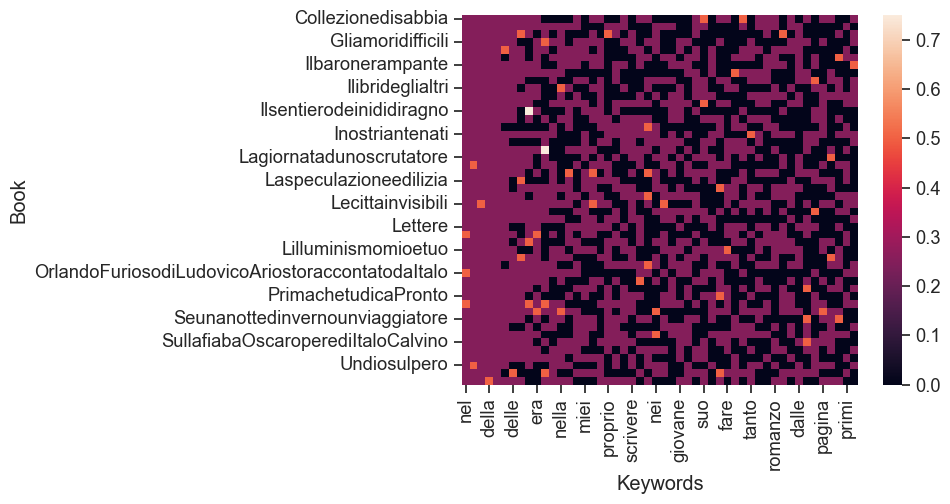

In [82]:
sb.heatmap(df[top_keywords])

# Translation Analysis

In [58]:
# CHANGE THE HYPER-PARAMETERS HERE! 
DATA_PATH = './1/data/Part 2 English/'
IS_ENGLISH = True

if not IS_ENGLISH:
    plt.rcParams['font.sans-serif'] = ['SimHei'] # Or any other Chinese characters
    plt.rcParams['axes.unicode_minus'] = False
else:
    plt.rcParams['font.sans-serif'] = ['Arial'] # Or any other Chinese characters

In [59]:
import os  # Import the os module

# Assuming the DATA_PATH variable is already defined
DATA_PATH = './1/data/Part 2 English/'

# Generate a list of file paths in the DATA_PATH directory, excluding hidden files
book_paths = [os.path.join(DATA_PATH, x) for x in os.listdir(DATA_PATH) if not x.startswith('.')]

# Print the number of items in the book_paths list
print(len(book_paths))

2


In [60]:
def parse_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    text = ""
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text += page.get_text()
    doc.close()
    return text

def parse_epub(epub_file):
    book = epub.read_epub(epub_file)
    book_text = ""
    for item in book.get_items():
        if isinstance(item, epub.EpubHtml):
            book_text += item.get_body_content().decode('utf-8', errors='ignore')  # Decode content and ignore errors
    return book_text

In [61]:
book2text = {}
for book_path in tqdm(book_paths):
    if book_path.endswith('.pdf'):
        text = parse_pdf(book_path)
    if book_path.endswith('.epub'):
        text = parse_epub(book_path)
    else:
        continue 
    if len(text) == 0:
        print(f'[WARN] Empty string parsed from {book_path}')
    else:
        book2text[book_path] = text
        
book2text.keys()

  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\Admin\anaconda3\Lib\site-packages\ebooklib\epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
100%|██████████| 2/2 [00:00<00:00, 14.93it/s]


dict_keys(['./1/data/Part 2 English/Invisible Cities.epub', './1/data/Part 2 English/The Castle Of Crossed Destinies.epub'])

In [62]:
"""
1. Remove all the special characters. 
2. Remove all the meta information like <span>, <p>, <href>..., since only the coherent text is useful. 
"""

import re 


def clean_text(sentence):
    # Remove HTML tags and attributes
    clean_sentence = re.sub(r'<.*?>', '', sentence)
    # Remove special characters except alphanumeric (English and Chinese), spaces, and apostrophes
    clean_sentence = re.sub(r'[^\w\s\u4e00-\u9fff]', '', clean_sentence)
    # Remove extra spaces (Note: Chinese text typically does not use spaces)
    clean_sentence = re.sub(r'\s+', ' ', clean_sentence).strip()
    return clean_sentence

    
for book, text in tqdm(book2text.items()):
    book2text[book] = clean_text(text)
    
book2text.keys()

100%|██████████| 2/2 [00:00<00:00, 32.08it/s]


dict_keys(['./1/data/Part 2 English/Invisible Cities.epub', './1/data/Part 2 English/The Castle Of Crossed Destinies.epub'])

## Segmentation


In [63]:
def split_text_to_chunks(text, chunk_size_kb=30):
    # Define the chunk size in bytes (30KB)
    chunk_size_bytes = chunk_size_kb * 1024
    # Encode the text to UTF-8
    utf8_text = text.encode('utf-8')
    # Initialize variables
    chunks = []
    start = 0
    text_length = len(utf8_text)
    
    while start < text_length:
        end = start + chunk_size_bytes
        # Ensure we don't cut off in the middle of a multibyte character
        while end < text_length and (utf8_text[end] & 0xC0) == 0x80:
            end -= 1
        chunk = utf8_text[start:end].decode('utf-8', errors='ignore')
        chunks.append(chunk)
        start = end
    
    return chunks

def save_chunks(chunks, output_dir="chunks"):
    os.makedirs(output_dir, exist_ok=True)
    
    for i, chunk in enumerate(chunks):
        with open(f"{output_dir}/chunk_{i+1}.txt", "w+", encoding="utf-8") as f:
            f.write(chunk)

In [64]:
book2chunks = {}

for book, text in tqdm(book2text.items()):
    chunks = split_text_to_chunks(text, chunk_size_kb=10)
    print(f'[DEBUG] {len(chunks)} chunks fround in {book}')
    book2chunks[book] = chunks

100%|██████████| 2/2 [00:00<00:00, 1999.67it/s]

[DEBUG] 15 chunks fround in ./1/data/Part 2 English/Invisible Cities.epub
[DEBUG] 17 chunks fround in ./1/data/Part 2 English/The Castle Of Crossed Destinies.epub


## Construct the features

Here is the list of NLP features converted into English:

1. Lexical density
2. Standard lexical density
3. Average word length
4. Noun ratio
5. Verb ratio
6. Adjective ratio
7. Adverb ratio
8. Preposition ratio
9. Pronoun ratio
10. Numeral ratio
11. Exclamation ratio
12. Modal particle ratio
13. Content word ratio
14. Content word density
15. Function word ratio
16. Function word density
17. Average sentence length
18. Declarative sentence ratio
19. Interrogative sentence ratio
20. Exclamatory sentence ratio
21. Comma ratio
22. Semicolon ratio
23. Pause mark ratio
24. Ellipsis ratio
25. Parenthesis ratio
26. Quotation mark ratio
27. "Ba" construction ratio
28. "Bei" construction ratio
29. Idiom ratio
30. Idiom density
31. Dialect word ratio
32. Conjunction ratio
33. Auxiliary word ratio

In [65]:
import pandas as pd
import spacy
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np


# Load spaCy model
nlp = spacy.load("en_core_web_sm") if IS_ENGLISH else spacy.load("zh_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [ ]:
def extract_features(text):
    # Process text with spaCy
    doc = nlp(text)
    words = [token.text for token in doc]
    sentences = [sent.text for sent in doc.sents]
    # Part-of-speech tagging using NLTK
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    # POS tags counts
    pos_counts = Counter(tag for word, tag in pos_tags)

    
    # Feature extraction
    total_words = len(words)
    total_sentences = len(sentences)
    if total_words == 0:
        total_words = 1  # Avoid division by zero
    if total_sentences == 0:
        total_sentences = 1  # Avoid division by zero
    
    def get_ratio(count):
        return count / total_words

    features = {
        "lexical_density": get_ratio(len(set(words))),
        "standard_lexical_density": get_ratio(len(set(word.lower() for word in words))),
        "average_word_length": sum(len(word) for word in words) / total_words,
        "noun_ratio": get_ratio(pos_counts['NOUN'] + pos_counts['PROPN']),
        "verb_ratio": get_ratio(pos_counts['VERB'] + pos_counts['AUX']),
        "adjective_ratio": get_ratio(pos_counts['ADJ']),
        "adverb_ratio": get_ratio(pos_counts['ADV']),
        "preposition_ratio": get_ratio(pos_counts['ADP']),
        "pronoun_ratio": get_ratio(pos_counts['PRON']),
        "numeral_ratio": get_ratio(pos_counts['NUM']),
        "interjection_ratio": get_ratio(pos_counts['INTJ']),
        "content_word_ratio": get_ratio(pos_counts['NOUN'] + pos_counts['PROPN'] + pos_counts['VERB'] + pos_counts['AUX'] + pos_counts['ADJ'] + pos_counts['ADV']),
        "content_word_density": (pos_counts['NOUN'] + pos_counts['PROPN'] + pos_counts['VERB'] + pos_counts['AUX'] + pos_counts['ADJ'] + pos_counts['ADV']) / total_sentences,
        "function_word_ratio": get_ratio(pos_counts['ADP'] + pos_counts['DET'] + pos_counts['CCONJ'] + pos_counts['SCONJ'] + pos_counts['PART'] + pos_counts['PRON']),
        "function_word_density": (pos_counts['ADP'] + pos_counts['DET'] + pos_counts['CCONJ'] + pos_counts['SCONJ'] + pos_counts['PART'] + pos_counts['PRON']) / total_sentences,
        "average_sentence_length": total_words / total_sentences,
        "declarative_sentence_ratio": get_ratio(len([sent for sent in sentences if sent.endswith('.') or sent.endswith('!') or sent.endswith('?')])),
        "interrogative_sentence_ratio": get_ratio(len([sent for sent in sentences if sent.endswith('?')])),
        "exclamatory_sentence_ratio": get_ratio(len([sent for sent in sentences if sent.endswith('!')])),
        "comma_ratio": get_ratio(text.count(',')),
        "enumeration_comma_ratio": get_ratio(text.count('、')),
        "ellipsis_ratio": get_ratio(text.count('...')),
        "parenthesis_ratio": get_ratio(text.count('(') + text.count(')')),
        "quotation_ratio": get_ratio(text.count('"')),
        "ba_sentence_ratio": get_ratio(text.count('把')),
        "bei_sentence_ratio": get_ratio(text.count('被')),
        "conjunction_ratio": get_ratio(pos_counts['CCONJ']),
        "auxiliary_ratio": get_ratio(pos_counts['AUX'])
    }
    
    return features

In [ ]:
feature_df = []

for book, chunks in tqdm(book2chunks.items()):
    for chunk in chunks:
        features = extract_features(chunk)
        features['Author'] = book
        feature_df.append(features)

feature_df = pd.DataFrame(feature_df)
feature_df.describe()

### Visualize the features

In [ ]:
columns_to_visualize = [x for x in feature_df.columns if x != 'Author' and 
                        feature_df[x].std() != 0]
columns_to_visualize

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_df['Book'] = feature_df['Author'].apply(lambda x: x.split('/')[-1])

colors = ['lightpink', 'lightblue']

for col in columns_to_visualize:
    plt.figure()  
    sns.barplot(data=feature_df[[col, 'Book']], x='Book', y=col, palette=colors)
    plt.xticks(rotation=90)  
    plt.title(col)  
    plt.show() 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Load the data
data = feature_df

# Select features and target
X = data.drop(columns=['Author'])
y = data['Author']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Option 1: Remove non-numeric columns from X
# X = X.select_dtypes(include=[np.number])

# Option 2: Encode non-numeric columns (use if needed)
X = pd.get_dummies(X, drop_first=True)

# Initialize the classifiers
decision_tree = DecisionTreeClassifier()
svm = SVC()
random_forest = RandomForestClassifier()

# Perform 10-fold cross-validation for Decision Tree
dt_scores = cross_val_score(decision_tree, X, y_encoded, cv=10)
print(f"Decision Tree 10-Fold Cross-Validation Accuracy: {np.mean(dt_scores)}")

# Perform 10-fold cross-validation for SVM 
svm_scores = cross_val_score(svm, X, y_encoded, cv=10)
print(f"SVM 10-Fold Cross-Validation Accuracy: {np.mean(svm_scores)}")

# Perform 10-fold cross-validation for RandomForest
randomforest_scores = cross_val_score(random_forest, X, y_encoded, cv=10)
print(f"RandomForest 10-Fold Cross-Validation Accuracy: {np.mean(randomforest_scores)}")

### Fine-tuning SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize the classifiers
svm = SVC()

# Perform 10-fold cross-validation for SVM 
svm_scores = cross_val_score(svm, X, y_encoded, cv=10)
print(f"SVM 10-Fold Cross-Validation Accuracy: {np.mean(svm_scores)}")

# Hyperparameter tuning for SVM using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X, y_encoded)

print(f"Best parameters for SVM: {grid_search.best_params_}")
print(f"Best cross-validation accuracy for SVM: {grid_search.best_score_}")

# Evaluate the best SVM model on the test set
best_svm = grid_search.best_estimator_
best_svm_scores = cross_val_score(best_svm, X, y_encoded, cv=10)
print(f"Best SVM 10-Fold Cross-Validation Accuracy: {np.mean(best_svm_scores)}")

## Cluster Visualize 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib import transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 加载数据
X = feature_df.drop(columns=['Author'])  # 特征
y = feature_df['Author']  # 标签

# 对分类特征进行One-Hot编码（如果需要）
X = pd.get_dummies(X, drop_first=True)

# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 编码目标标签
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 初始化模型并设置参数以减少过拟合

# 决策树：限制树的最大深度、最小样本分裂数和最小叶节点样本数
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# SVM：调整正则化参数C以控制模型复杂性
svm = SVC(C=0.1)

# 随机森林：设置树的数量和最大深度
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)

# 使用10折交叉验证评估每个模型的表现

# 决策树的10折交叉验证
dt_scores = cross_val_score(decision_tree, X_scaled, y_encoded, cv=10)
print(f"Decision Tree 10-Fold Cross-Validation Accuracy: {np.mean(dt_scores)}")

# SVM的10折交叉验证
svm_scores = cross_val_score(svm, X_scaled, y_encoded, cv=10)
print(f"SVM 10-Fold Cross-Validation Accuracy: {np.mean(svm_scores)}")

# 随机森林的10折交叉验证
randomforest_scores = cross_val_score(random_forest, X_scaled, y_encoded, cv=10)
print(f"RandomForest 10-Fold Cross-Validation Accuracy: {np.mean(randomforest_scores)}")

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
versions = y.unique()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=len(y.unique()), random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
len(versions)

In [ ]:
# Function to plot confidence ellipses
def plot_confidence_ellipse(mean, cov, ax, n_std=1.96, **kwargs):
    if np.any(np.isnan(cov)) or np.any(np.isinf(cov)):
        return  # Skip invalid covariance matrices

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std

    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, alpha=0.3, edgecolor='none', **kwargs)
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean[0], mean[1])
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:
# Plotting the clusters with cluster ID and version
colors = plt.cm.get_cmap('tab10', len(np.unique(clusters)))
markers = ['o', 's', 'd', 
           'X', '+', 'v',
          '>', 'D', 'p']  # Different markers for versions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# 假设 `X_pca`, `clusters`, `y`, `colors` 已经定义

# Function to plot confidence ellipses
def plot_confidence_ellipse(mean, cov, ax, n_std=1.96, **kwargs):
    if np.any(np.isnan(cov)) or np.any(np.isinf(cov)):
        return  # Skip invalid covariance matrices

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std

    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, alpha=0.3, edgecolor='none', **kwargs)
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean[0], mean[1])
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

fig, ax = plt.subplots(figsize=(10, 7))

# Iterate through each cluster to plot the points and ellipses
for cluster in np.unique(clusters):
    cluster_points = X_pca[clusters == cluster]
    
    # 从原始的 `y` 中筛选与当前聚类匹配的文件名称
    file_names = y[clusters == cluster]
    # 选择每个聚类中频率最高的文件名
    unique, counts = np.unique(file_names, return_counts=True)
    most_frequent_file = unique[np.argmax(counts)]
    
    # 添加图例标签，包含聚类ID和最频繁文件名称
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               alpha=0.6, color=colors(cluster), label=f'Cluster {cluster}: {most_frequent_file}')
    
    # Plot the confidence ellipse for each cluster
    mean = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points.T)
    plot_confidence_ellipse(mean, cov, ax, facecolor=colors(cluster))

# 自动生成图例并放置在适合位置
ax.legend(title='Cluster ID and Most Frequent File', loc='upper right')

# Set labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Analysis with 95% Confidence Intervals')

# Show the plot
plt.show()


